# Emoji Prediction - ECS 171 Group Project

# Setting Up

We import libraries and download our dataset from kaggle

In [1]:
# importing libraries
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPool2D, Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import keras.utils as image

2022-12-05 21:19:21.235060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/arnavrastogi/.kaggle: File exists
cp: kaggle.json: No such file or directory


In [4]:
! kaggle datasets download -d msambare/fer2013

 99%|█████████████████████████████████████▊| 60.0M/60.3M [00:04<00:00, 15.5MB/s]
100%|██████████████████████████████████████| 60.3M/60.3M [00:04<00:00, 14.1MB/s]


In [5]:
! unzip fer2013.zip;

Archive:  fer2013.zip
  inflating: test/angry/PrivateTest_10131363.jpg  
  inflating: test/angry/PrivateTest_10304478.jpg  
  inflating: test/angry/PrivateTest_1054527.jpg  
  inflating: test/angry/PrivateTest_10590091.jpg  
  inflating: test/angry/PrivateTest_1109992.jpg  
  inflating: test/angry/PrivateTest_11296953.jpg  
  inflating: test/angry/PrivateTest_12000629.jpg  
  inflating: test/angry/PrivateTest_12008383.jpg  
  inflating: test/angry/PrivateTest_12191716.jpg  
  inflating: test/angry/PrivateTest_1221822.jpg  
  inflating: test/angry/PrivateTest_12403575.jpg  
  inflating: test/angry/PrivateTest_12766285.jpg  
  inflating: test/angry/PrivateTest_12846357.jpg  
  inflating: test/angry/PrivateTest_1290484.jpg  
  inflating: test/angry/PrivateTest_12912780.jpg  
  inflating: test/angry/PrivateTest_13164119.jpg  
  inflating: test/angry/PrivateTest_13278552.jpg  
  inflating: test/angry/PrivateTest_13463625.jpg  
  inflating: test/angry/PrivateTest_13541561.jpg  
  inflating: 

  inflating: test/angry/PrivateTest_70837533.jpg  
  inflating: test/angry/PrivateTest_71268050.jpg  
  inflating: test/angry/PrivateTest_71295423.jpg  
  inflating: test/angry/PrivateTest_71429384.jpg  
  inflating: test/angry/PrivateTest_71947816.jpg  
  inflating: test/angry/PrivateTest_72495721.jpg  
  inflating: test/angry/PrivateTest_73119240.jpg  
  inflating: test/angry/PrivateTest_73130508.jpg  
  inflating: test/angry/PrivateTest_731447.jpg  
  inflating: test/angry/PrivateTest_73170949.jpg  
  inflating: test/angry/PrivateTest_73408654.jpg  
  inflating: test/angry/PrivateTest_73419397.jpg  
  inflating: test/angry/PrivateTest_73809809.jpg  
  inflating: test/angry/PrivateTest_73860110.jpg  
  inflating: test/angry/PrivateTest_73918107.jpg  
  inflating: test/angry/PrivateTest_73956607.jpg  
  inflating: test/angry/PrivateTest_74063382.jpg  
  inflating: test/angry/PrivateTest_74178058.jpg  
  inflating: test/angry/PrivateTest_74436169.jpg  
  inflating: test/angry/PrivateTe

  inflating: test/angry/PublicTest_18682426.jpg  
  inflating: test/angry/PublicTest_18770630.jpg  
  inflating: test/angry/PublicTest_19183266.jpg  
  inflating: test/angry/PublicTest_19319090.jpg  
  inflating: test/angry/PublicTest_19679720.jpg  
  inflating: test/angry/PublicTest_1990985.jpg  
  inflating: test/angry/PublicTest_20045813.jpg  
  inflating: test/angry/PublicTest_20725544.jpg  
  inflating: test/angry/PublicTest_20761396.jpg  
  inflating: test/angry/PublicTest_20874883.jpg  
  inflating: test/angry/PublicTest_21110779.jpg  
  inflating: test/angry/PublicTest_21226976.jpg  
  inflating: test/angry/PublicTest_21334851.jpg  
  inflating: test/angry/PublicTest_21498023.jpg  
  inflating: test/angry/PublicTest_22161894.jpg  
  inflating: test/angry/PublicTest_22423869.jpg  
  inflating: test/angry/PublicTest_22516549.jpg  
  inflating: test/angry/PublicTest_22869801.jpg  
  inflating: test/angry/PublicTest_23643566.jpg  
  inflating: test/angry/PublicTest_2392824.jpg  
  

  inflating: test/angry/PublicTest_66951145.jpg  
  inflating: test/angry/PublicTest_66956737.jpg  
  inflating: test/angry/PublicTest_67037873.jpg  
  inflating: test/angry/PublicTest_67087752.jpg  
  inflating: test/angry/PublicTest_67146017.jpg  
  inflating: test/angry/PublicTest_67194596.jpg  
  inflating: test/angry/PublicTest_67411006.jpg  
  inflating: test/angry/PublicTest_67751726.jpg  
  inflating: test/angry/PublicTest_68635331.jpg  
  inflating: test/angry/PublicTest_68682113.jpg  
  inflating: test/angry/PublicTest_68853210.jpg  
  inflating: test/angry/PublicTest_69095122.jpg  
  inflating: test/angry/PublicTest_69123222.jpg  
  inflating: test/angry/PublicTest_69194031.jpg  
  inflating: test/angry/PublicTest_69709353.jpg  
  inflating: test/angry/PublicTest_6998820.jpg  
  inflating: test/angry/PublicTest_70071887.jpg  
  inflating: test/angry/PublicTest_70126767.jpg  
  inflating: test/angry/PublicTest_70289097.jpg  
  inflating: test/angry/PublicTest_70470561.jpg  
 

  inflating: test/disgust/PublicTest_15466645.jpg  
  inflating: test/disgust/PublicTest_15595284.jpg  
  inflating: test/disgust/PublicTest_16053137.jpg  
  inflating: test/disgust/PublicTest_1799001.jpg  
  inflating: test/disgust/PublicTest_1829684.jpg  
  inflating: test/disgust/PublicTest_20464211.jpg  
  inflating: test/disgust/PublicTest_2183494.jpg  
  inflating: test/disgust/PublicTest_28485599.jpg  
  inflating: test/disgust/PublicTest_30164595.jpg  
  inflating: test/disgust/PublicTest_31237465.jpg  
  inflating: test/disgust/PublicTest_32023453.jpg  
  inflating: test/disgust/PublicTest_35686619.jpg  
  inflating: test/disgust/PublicTest_37923555.jpg  
  inflating: test/disgust/PublicTest_39191720.jpg  
  inflating: test/disgust/PublicTest_41393563.jpg  
  inflating: test/disgust/PublicTest_41633403.jpg  
  inflating: test/disgust/PublicTest_42217610.jpg  
  inflating: test/disgust/PublicTest_43293519.jpg  
  inflating: test/disgust/PublicTest_48565094.jpg  
  inflating: te

  inflating: test/fear/PrivateTest_42886885.jpg  
  inflating: test/fear/PrivateTest_43044676.jpg  
  inflating: test/fear/PrivateTest_43091184.jpg  
  inflating: test/fear/PrivateTest_43165478.jpg  
  inflating: test/fear/PrivateTest_43292344.jpg  
  inflating: test/fear/PrivateTest_43304058.jpg  
  inflating: test/fear/PrivateTest_43354822.jpg  
  inflating: test/fear/PrivateTest_43420384.jpg  
  inflating: test/fear/PrivateTest_43551877.jpg  
  inflating: test/fear/PrivateTest_43799748.jpg  
  inflating: test/fear/PrivateTest_43804431.jpg  
  inflating: test/fear/PrivateTest_43881605.jpg  
  inflating: test/fear/PrivateTest_44108227.jpg  
  inflating: test/fear/PrivateTest_44328873.jpg  
  inflating: test/fear/PrivateTest_44395779.jpg  
  inflating: test/fear/PrivateTest_44564903.jpg  
  inflating: test/fear/PrivateTest_4465801.jpg  
  inflating: test/fear/PrivateTest_44692111.jpg  
  inflating: test/fear/PrivateTest_44709368.jpg  
  inflating: test/fear/PrivateTest_44724226.jpg  
 

  inflating: test/fear/PrivateTest_84303335.jpg  
  inflating: test/fear/PrivateTest_85377987.jpg  
  inflating: test/fear/PrivateTest_85409547.jpg  
  inflating: test/fear/PrivateTest_85484376.jpg  
  inflating: test/fear/PrivateTest_85557728.jpg  
  inflating: test/fear/PrivateTest_85674850.jpg  
  inflating: test/fear/PrivateTest_8576699.jpg  
  inflating: test/fear/PrivateTest_86045446.jpg  
  inflating: test/fear/PrivateTest_86063456.jpg  
  inflating: test/fear/PrivateTest_86177043.jpg  
  inflating: test/fear/PrivateTest_86186503.jpg  
  inflating: test/fear/PrivateTest_86207902.jpg  
  inflating: test/fear/PrivateTest_8664224.jpg  
  inflating: test/fear/PrivateTest_86761031.jpg  
  inflating: test/fear/PrivateTest_86819061.jpg  
  inflating: test/fear/PrivateTest_86847714.jpg  
  inflating: test/fear/PrivateTest_86867911.jpg  
  inflating: test/fear/PrivateTest_87149754.jpg  
  inflating: test/fear/PrivateTest_87205190.jpg  
  inflating: test/fear/PrivateTest_87242310.jpg  
  

  inflating: test/fear/PublicTest_40089687.jpg  
  inflating: test/fear/PublicTest_40273600.jpg  
  inflating: test/fear/PublicTest_40298698.jpg  
  inflating: test/fear/PublicTest_40311570.jpg  
  inflating: test/fear/PublicTest_40423206.jpg  
  inflating: test/fear/PublicTest_40981629.jpg  
  inflating: test/fear/PublicTest_41247372.jpg  
  inflating: test/fear/PublicTest_41415927.jpg  
  inflating: test/fear/PublicTest_4163932.jpg  
  inflating: test/fear/PublicTest_41743385.jpg  
  inflating: test/fear/PublicTest_41751585.jpg  
  inflating: test/fear/PublicTest_41849972.jpg  
  inflating: test/fear/PublicTest_42109927.jpg  
  inflating: test/fear/PublicTest_42755313.jpg  
  inflating: test/fear/PublicTest_42800790.jpg  
  inflating: test/fear/PublicTest_4289779.jpg  
  inflating: test/fear/PublicTest_43010364.jpg  
  inflating: test/fear/PublicTest_43074366.jpg  
  inflating: test/fear/PublicTest_43267704.jpg  
  inflating: test/fear/PublicTest_43304350.jpg  
  inflating: test/fear

  inflating: test/fear/PublicTest_81224281.jpg  
  inflating: test/fear/PublicTest_81325541.jpg  
  inflating: test/fear/PublicTest_81420955.jpg  
  inflating: test/fear/PublicTest_81588344.jpg  
  inflating: test/fear/PublicTest_81646674.jpg  
  inflating: test/fear/PublicTest_81745978.jpg  
  inflating: test/fear/PublicTest_81985956.jpg  
  inflating: test/fear/PublicTest_81993157.jpg  
  inflating: test/fear/PublicTest_82140859.jpg  
  inflating: test/fear/PublicTest_8214715.jpg  
  inflating: test/fear/PublicTest_82552414.jpg  
  inflating: test/fear/PublicTest_82567274.jpg  
  inflating: test/fear/PublicTest_82742487.jpg  
  inflating: test/fear/PublicTest_83048829.jpg  
  inflating: test/fear/PublicTest_83155635.jpg  
  inflating: test/fear/PublicTest_8365577.jpg  
  inflating: test/fear/PublicTest_83801080.jpg  
  inflating: test/fear/PublicTest_83801776.jpg  
  inflating: test/fear/PublicTest_83859907.jpg  
  inflating: test/fear/PublicTest_83872938.jpg  
  inflating: test/fear

  inflating: test/happy/PrivateTest_27045032.jpg  
  inflating: test/happy/PrivateTest_27068178.jpg  
  inflating: test/happy/PrivateTest_27144786.jpg  
  inflating: test/happy/PrivateTest_27200809.jpg  
  inflating: test/happy/PrivateTest_27226756.jpg  
  inflating: test/happy/PrivateTest_27353025.jpg  
  inflating: test/happy/PrivateTest_27403434.jpg  
  inflating: test/happy/PrivateTest_27430217.jpg  
  inflating: test/happy/PrivateTest_27554547.jpg  
  inflating: test/happy/PrivateTest_27605133.jpg  
  inflating: test/happy/PrivateTest_2764941.jpg  
  inflating: test/happy/PrivateTest_27678988.jpg  
  inflating: test/happy/PrivateTest_27778676.jpg  
  inflating: test/happy/PrivateTest_27822169.jpg  
  inflating: test/happy/PrivateTest_28122366.jpg  
  inflating: test/happy/PrivateTest_28380066.jpg  
  inflating: test/happy/PrivateTest_28576977.jpg  
  inflating: test/happy/PrivateTest_28726237.jpg  
  inflating: test/happy/PrivateTest_28785248.jpg  
  inflating: test/happy/PrivateT

  inflating: test/happy/PrivateTest_45910002.jpg  
  inflating: test/happy/PrivateTest_45965771.jpg  
  inflating: test/happy/PrivateTest_45987104.jpg  
  inflating: test/happy/PrivateTest_46068756.jpg  
  inflating: test/happy/PrivateTest_46081026.jpg  
  inflating: test/happy/PrivateTest_46100411.jpg  
  inflating: test/happy/PrivateTest_4628769.jpg  
  inflating: test/happy/PrivateTest_46345890.jpg  
  inflating: test/happy/PrivateTest_46389051.jpg  
  inflating: test/happy/PrivateTest_46477969.jpg  
  inflating: test/happy/PrivateTest_46585222.jpg  
  inflating: test/happy/PrivateTest_46665621.jpg  
  inflating: test/happy/PrivateTest_46775695.jpg  
  inflating: test/happy/PrivateTest_46776895.jpg  
  inflating: test/happy/PrivateTest_46912406.jpg  
  inflating: test/happy/PrivateTest_47046591.jpg  
  inflating: test/happy/PrivateTest_47110154.jpg  
  inflating: test/happy/PrivateTest_47162929.jpg  
  inflating: test/happy/PrivateTest_47361515.jpg  
  inflating: test/happy/PrivateT

  inflating: test/happy/PrivateTest_77565409.jpg  
  inflating: test/happy/PrivateTest_77653683.jpg  
  inflating: test/happy/PrivateTest_77666289.jpg  
  inflating: test/happy/PrivateTest_77938501.jpg  
  inflating: test/happy/PrivateTest_77984612.jpg  
  inflating: test/happy/PrivateTest_77984986.jpg  
  inflating: test/happy/PrivateTest_78066989.jpg  
  inflating: test/happy/PrivateTest_78076860.jpg  
  inflating: test/happy/PrivateTest_7868121.jpg  
  inflating: test/happy/PrivateTest_78943374.jpg  
  inflating: test/happy/PrivateTest_7896997.jpg  
  inflating: test/happy/PrivateTest_79166758.jpg  
  inflating: test/happy/PrivateTest_79186661.jpg  
  inflating: test/happy/PrivateTest_79360002.jpg  
  inflating: test/happy/PrivateTest_79387813.jpg  
  inflating: test/happy/PrivateTest_79399088.jpg  
  inflating: test/happy/PrivateTest_79401634.jpg  
  inflating: test/happy/PrivateTest_79430934.jpg  
  inflating: test/happy/PrivateTest_79433800.jpg  
  inflating: test/happy/PrivateTe

  inflating: test/happy/PrivateTest_99314173.jpg  
  inflating: test/happy/PrivateTest_99320853.jpg  
  inflating: test/happy/PrivateTest_99509146.jpg  
  inflating: test/happy/PrivateTest_99672421.jpg  
  inflating: test/happy/PrivateTest_99691745.jpg  
  inflating: test/happy/PrivateTest_99764146.jpg  
  inflating: test/happy/PrivateTest_99802225.jpg  
  inflating: test/happy/PrivateTest_99871365.jpg  
  inflating: test/happy/PublicTest_10130075.jpg  
  inflating: test/happy/PublicTest_10181609.jpg  
  inflating: test/happy/PublicTest_10245799.jpg  
  inflating: test/happy/PublicTest_10248771.jpg  
  inflating: test/happy/PublicTest_10283102.jpg  
  inflating: test/happy/PublicTest_10303060.jpg  
  inflating: test/happy/PublicTest_10527411.jpg  
  inflating: test/happy/PublicTest_10886374.jpg  
  inflating: test/happy/PublicTest_11060787.jpg  
  inflating: test/happy/PublicTest_11107518.jpg  
  inflating: test/happy/PublicTest_11211241.jpg  
  inflating: test/happy/PublicTest_1139439

  inflating: test/happy/PublicTest_32851310.jpg  
  inflating: test/happy/PublicTest_32862356.jpg  
  inflating: test/happy/PublicTest_32960343.jpg  
  inflating: test/happy/PublicTest_3299093.jpg  
  inflating: test/happy/PublicTest_33025709.jpg  
  inflating: test/happy/PublicTest_33254956.jpg  
  inflating: test/happy/PublicTest_33256402.jpg  
  inflating: test/happy/PublicTest_33340944.jpg  
  inflating: test/happy/PublicTest_33635814.jpg  
  inflating: test/happy/PublicTest_33726932.jpg  
  inflating: test/happy/PublicTest_33738386.jpg  
  inflating: test/happy/PublicTest_34029739.jpg  
  inflating: test/happy/PublicTest_34451492.jpg  
  inflating: test/happy/PublicTest_3469437.jpg  
  inflating: test/happy/PublicTest_34777524.jpg  
  inflating: test/happy/PublicTest_34820323.jpg  
  inflating: test/happy/PublicTest_34920736.jpg  
  inflating: test/happy/PublicTest_35010457.jpg  
  inflating: test/happy/PublicTest_35396194.jpg  
  inflating: test/happy/PublicTest_3586567.jpg  
  i

  inflating: test/happy/PublicTest_53908496.jpg  
  inflating: test/happy/PublicTest_54116817.jpg  
  inflating: test/happy/PublicTest_54130548.jpg  
  inflating: test/happy/PublicTest_54137688.jpg  
  inflating: test/happy/PublicTest_54175608.jpg  
  inflating: test/happy/PublicTest_54232205.jpg  
  inflating: test/happy/PublicTest_54623349.jpg  
  inflating: test/happy/PublicTest_54656943.jpg  
  inflating: test/happy/PublicTest_54714677.jpg  
  inflating: test/happy/PublicTest_54801370.jpg  
  inflating: test/happy/PublicTest_5500184.jpg  
  inflating: test/happy/PublicTest_55023104.jpg  
  inflating: test/happy/PublicTest_55041624.jpg  
  inflating: test/happy/PublicTest_55178437.jpg  
  inflating: test/happy/PublicTest_55239463.jpg  
  inflating: test/happy/PublicTest_55281637.jpg  
  inflating: test/happy/PublicTest_55349529.jpg  
  inflating: test/happy/PublicTest_5553117.jpg  
  inflating: test/happy/PublicTest_55596965.jpg  
  inflating: test/happy/PublicTest_55677946.jpg  
  

  inflating: test/happy/PublicTest_73276308.jpg  
  inflating: test/happy/PublicTest_73368258.jpg  
  inflating: test/happy/PublicTest_73443038.jpg  
  inflating: test/happy/PublicTest_73451807.jpg  
  inflating: test/happy/PublicTest_73539778.jpg  
  inflating: test/happy/PublicTest_73609973.jpg  
  inflating: test/happy/PublicTest_73676066.jpg  
  inflating: test/happy/PublicTest_73677078.jpg  
  inflating: test/happy/PublicTest_73693458.jpg  
  inflating: test/happy/PublicTest_73864122.jpg  
  inflating: test/happy/PublicTest_7387516.jpg  
  inflating: test/happy/PublicTest_74006209.jpg  
  inflating: test/happy/PublicTest_74169704.jpg  
  inflating: test/happy/PublicTest_74227592.jpg  
  inflating: test/happy/PublicTest_74274614.jpg  
  inflating: test/happy/PublicTest_74292053.jpg  
  inflating: test/happy/PublicTest_74406905.jpg  
  inflating: test/happy/PublicTest_74596575.jpg  
  inflating: test/happy/PublicTest_74706037.jpg  
  inflating: test/happy/PublicTest_74759378.jpg  
 

  inflating: test/happy/PublicTest_96920832.jpg  
  inflating: test/happy/PublicTest_96979522.jpg  
  inflating: test/happy/PublicTest_97013386.jpg  
  inflating: test/happy/PublicTest_97144802.jpg  
  inflating: test/happy/PublicTest_97150877.jpg  
  inflating: test/happy/PublicTest_97161581.jpg  
  inflating: test/happy/PublicTest_97173493.jpg  
  inflating: test/happy/PublicTest_97297069.jpg  
  inflating: test/happy/PublicTest_97435785.jpg  
  inflating: test/happy/PublicTest_97542823.jpg  
  inflating: test/happy/PublicTest_97618815.jpg  
  inflating: test/happy/PublicTest_97661985.jpg  
  inflating: test/happy/PublicTest_97807894.jpg  
  inflating: test/happy/PublicTest_9789737.jpg  
  inflating: test/happy/PublicTest_9795756.jpg  
  inflating: test/happy/PublicTest_98111104.jpg  
  inflating: test/happy/PublicTest_98121424.jpg  
  inflating: test/happy/PublicTest_9818602.jpg  
  inflating: test/happy/PublicTest_9827448.jpg  
  inflating: test/happy/PublicTest_98276713.jpg  
  in

  inflating: test/neutral/PrivateTest_34051977.jpg  
  inflating: test/neutral/PrivateTest_3407426.jpg  
  inflating: test/neutral/PrivateTest_34273172.jpg  
  inflating: test/neutral/PrivateTest_34557009.jpg  
  inflating: test/neutral/PrivateTest_34584944.jpg  
  inflating: test/neutral/PrivateTest_34780114.jpg  
  inflating: test/neutral/PrivateTest_34826075.jpg  
  inflating: test/neutral/PrivateTest_34827864.jpg  
  inflating: test/neutral/PrivateTest_34983616.jpg  
  inflating: test/neutral/PrivateTest_35003749.jpg  
  inflating: test/neutral/PrivateTest_35487432.jpg  
  inflating: test/neutral/PrivateTest_35490031.jpg  
  inflating: test/neutral/PrivateTest_35541698.jpg  
  inflating: test/neutral/PrivateTest_3564144.jpg  
  inflating: test/neutral/PrivateTest_35739165.jpg  
  inflating: test/neutral/PrivateTest_35753773.jpg  
  inflating: test/neutral/PrivateTest_35952657.jpg  
  inflating: test/neutral/PrivateTest_36183074.jpg  
  inflating: test/neutral/PrivateTest_3655256.jp

  inflating: test/neutral/PrivateTest_60203152.jpg  
  inflating: test/neutral/PrivateTest_6029307.jpg  
  inflating: test/neutral/PrivateTest_60521672.jpg  
  inflating: test/neutral/PrivateTest_60542064.jpg  
  inflating: test/neutral/PrivateTest_60708271.jpg  
  inflating: test/neutral/PrivateTest_60778375.jpg  
  inflating: test/neutral/PrivateTest_60797107.jpg  
  inflating: test/neutral/PrivateTest_60848941.jpg  
  inflating: test/neutral/PrivateTest_60931075.jpg  
  inflating: test/neutral/PrivateTest_61135792.jpg  
  inflating: test/neutral/PrivateTest_61381637.jpg  
  inflating: test/neutral/PrivateTest_61407797.jpg  
  inflating: test/neutral/PrivateTest_61571979.jpg  
  inflating: test/neutral/PrivateTest_61767158.jpg  
  inflating: test/neutral/PrivateTest_62221086.jpg  
  inflating: test/neutral/PrivateTest_62310013.jpg  
  inflating: test/neutral/PrivateTest_62361354.jpg  
  inflating: test/neutral/PrivateTest_6236745.jpg  
  inflating: test/neutral/PrivateTest_62507899.j

  inflating: test/neutral/PrivateTest_90725249.jpg  
  inflating: test/neutral/PrivateTest_90730699.jpg  
  inflating: test/neutral/PrivateTest_90773419.jpg  
  inflating: test/neutral/PrivateTest_9130658.jpg  
  inflating: test/neutral/PrivateTest_91462172.jpg  
  inflating: test/neutral/PrivateTest_91502878.jpg  
  inflating: test/neutral/PrivateTest_91738489.jpg  
  inflating: test/neutral/PrivateTest_91833026.jpg  
  inflating: test/neutral/PrivateTest_91910366.jpg  
  inflating: test/neutral/PrivateTest_92075773.jpg  
  inflating: test/neutral/PrivateTest_92375498.jpg  
  inflating: test/neutral/PrivateTest_92570507.jpg  
  inflating: test/neutral/PrivateTest_92594866.jpg  
  inflating: test/neutral/PrivateTest_92868884.jpg  
  inflating: test/neutral/PrivateTest_93036786.jpg  
  inflating: test/neutral/PrivateTest_93163433.jpg  
  inflating: test/neutral/PrivateTest_93230493.jpg  
  inflating: test/neutral/PrivateTest_932822.jpg  
  inflating: test/neutral/PrivateTest_93348061.jp

  inflating: test/neutral/PublicTest_34288814.jpg  
  inflating: test/neutral/PublicTest_34345576.jpg  
  inflating: test/neutral/PublicTest_34505620.jpg  
  inflating: test/neutral/PublicTest_3468296.jpg  
  inflating: test/neutral/PublicTest_34864860.jpg  
  inflating: test/neutral/PublicTest_34947022.jpg  
  inflating: test/neutral/PublicTest_34971246.jpg  
  inflating: test/neutral/PublicTest_35123586.jpg  
  inflating: test/neutral/PublicTest_35421934.jpg  
  inflating: test/neutral/PublicTest_35641560.jpg  
  inflating: test/neutral/PublicTest_35807859.jpg  
  inflating: test/neutral/PublicTest_35914921.jpg  
  inflating: test/neutral/PublicTest_3615243.jpg  
  inflating: test/neutral/PublicTest_36186792.jpg  
  inflating: test/neutral/PublicTest_36417383.jpg  
  inflating: test/neutral/PublicTest_36569724.jpg  
  inflating: test/neutral/PublicTest_36640550.jpg  
  inflating: test/neutral/PublicTest_36847706.jpg  
  inflating: test/neutral/PublicTest_37042364.jpg  
  inflating: t

  inflating: test/neutral/PublicTest_66678442.jpg  
  inflating: test/neutral/PublicTest_66786769.jpg  
  inflating: test/neutral/PublicTest_66823417.jpg  
  inflating: test/neutral/PublicTest_67094310.jpg  
  inflating: test/neutral/PublicTest_67564551.jpg  
  inflating: test/neutral/PublicTest_67747988.jpg  
  inflating: test/neutral/PublicTest_67808581.jpg  
  inflating: test/neutral/PublicTest_68097202.jpg  
  inflating: test/neutral/PublicTest_68104078.jpg  
  inflating: test/neutral/PublicTest_68217650.jpg  
  inflating: test/neutral/PublicTest_68623235.jpg  
  inflating: test/neutral/PublicTest_68723852.jpg  
  inflating: test/neutral/PublicTest_68726009.jpg  
  inflating: test/neutral/PublicTest_69096583.jpg  
  inflating: test/neutral/PublicTest_69204976.jpg  
  inflating: test/neutral/PublicTest_69266622.jpg  
  inflating: test/neutral/PublicTest_69342366.jpg  
  inflating: test/neutral/PublicTest_69383833.jpg  
  inflating: test/neutral/PublicTest_6939854.jpg  
  inflating: 

  inflating: test/sad/PrivateTest_21734160.jpg  
  inflating: test/sad/PrivateTest_21760566.jpg  
  inflating: test/sad/PrivateTest_2202708.jpg  
  inflating: test/sad/PrivateTest_22191391.jpg  
  inflating: test/sad/PrivateTest_22199939.jpg  
  inflating: test/sad/PrivateTest_2223963.jpg  
  inflating: test/sad/PrivateTest_2233220.jpg  
  inflating: test/sad/PrivateTest_22407614.jpg  
  inflating: test/sad/PrivateTest_22453983.jpg  
  inflating: test/sad/PrivateTest_22673081.jpg  
  inflating: test/sad/PrivateTest_22714167.jpg  
  inflating: test/sad/PrivateTest_22791863.jpg  
  inflating: test/sad/PrivateTest_23030368.jpg  
  inflating: test/sad/PrivateTest_23077730.jpg  
  inflating: test/sad/PrivateTest_2311869.jpg  
  inflating: test/sad/PrivateTest_23248169.jpg  
  inflating: test/sad/PrivateTest_2326190.jpg  
  inflating: test/sad/PrivateTest_23297571.jpg  
  inflating: test/sad/PrivateTest_24153381.jpg  
  inflating: test/sad/PrivateTest_24324231.jpg  
  inflating: test/sad/Pri

  inflating: test/sad/PrivateTest_45977195.jpg  
  inflating: test/sad/PrivateTest_46455102.jpg  
  inflating: test/sad/PrivateTest_46492183.jpg  
  inflating: test/sad/PrivateTest_46496161.jpg  
  inflating: test/sad/PrivateTest_46864083.jpg  
  inflating: test/sad/PrivateTest_47048382.jpg  
  inflating: test/sad/PrivateTest_47084428.jpg  
  inflating: test/sad/PrivateTest_47129405.jpg  
  inflating: test/sad/PrivateTest_47186743.jpg  
  inflating: test/sad/PrivateTest_47322087.jpg  
  inflating: test/sad/PrivateTest_47616627.jpg  
  inflating: test/sad/PrivateTest_47702480.jpg  
  inflating: test/sad/PrivateTest_47968648.jpg  
  inflating: test/sad/PrivateTest_48221810.jpg  
  inflating: test/sad/PrivateTest_48306441.jpg  
  inflating: test/sad/PrivateTest_48446247.jpg  
  inflating: test/sad/PrivateTest_48581881.jpg  
  inflating: test/sad/PrivateTest_48762267.jpg  
  inflating: test/sad/PrivateTest_49582812.jpg  
  inflating: test/sad/PrivateTest_49627904.jpg  
  inflating: test/sa

  inflating: test/sad/PrivateTest_70820178.jpg  
  inflating: test/sad/PrivateTest_70820261.jpg  
  inflating: test/sad/PrivateTest_70891842.jpg  
  inflating: test/sad/PrivateTest_709416.jpg  
  inflating: test/sad/PrivateTest_7134876.jpg  
  inflating: test/sad/PrivateTest_71620539.jpg  
  inflating: test/sad/PrivateTest_71713293.jpg  
  inflating: test/sad/PrivateTest_71756617.jpg  
  inflating: test/sad/PrivateTest_71773207.jpg  
  inflating: test/sad/PrivateTest_72167156.jpg  
  inflating: test/sad/PrivateTest_72478106.jpg  
  inflating: test/sad/PrivateTest_72529610.jpg  
  inflating: test/sad/PrivateTest_72633292.jpg  
  inflating: test/sad/PrivateTest_72771757.jpg  
  inflating: test/sad/PrivateTest_72799468.jpg  
  inflating: test/sad/PrivateTest_7284076.jpg  
  inflating: test/sad/PrivateTest_72982460.jpg  
  inflating: test/sad/PrivateTest_72990169.jpg  
  inflating: test/sad/PrivateTest_73152696.jpg  
  inflating: test/sad/PrivateTest_73158433.jpg  
  inflating: test/sad/Pr

  inflating: test/sad/PrivateTest_96626869.jpg  
  inflating: test/sad/PrivateTest_96715686.jpg  
  inflating: test/sad/PrivateTest_96821489.jpg  
  inflating: test/sad/PrivateTest_97316864.jpg  
  inflating: test/sad/PrivateTest_97936927.jpg  
  inflating: test/sad/PrivateTest_98146855.jpg  
  inflating: test/sad/PrivateTest_98353892.jpg  
  inflating: test/sad/PrivateTest_98456327.jpg  
  inflating: test/sad/PrivateTest_9856991.jpg  
  inflating: test/sad/PrivateTest_9859012.jpg  
  inflating: test/sad/PrivateTest_98703040.jpg  
  inflating: test/sad/PrivateTest_98816692.jpg  
  inflating: test/sad/PrivateTest_99071447.jpg  
  inflating: test/sad/PrivateTest_99277866.jpg  
  inflating: test/sad/PrivateTest_99565802.jpg  
  inflating: test/sad/PrivateTest_99602282.jpg  
  inflating: test/sad/PrivateTest_9966612.jpg  
  inflating: test/sad/PrivateTest_99697348.jpg  
  inflating: test/sad/PrivateTest_99866801.jpg  
  inflating: test/sad/PublicTest_10404299.jpg  
  inflating: test/sad/Pu

  inflating: test/sad/PublicTest_32322308.jpg  
  inflating: test/sad/PublicTest_32644585.jpg  
  inflating: test/sad/PublicTest_32730155.jpg  
  inflating: test/sad/PublicTest_32829892.jpg  
  inflating: test/sad/PublicTest_32923630.jpg  
  inflating: test/sad/PublicTest_33096127.jpg  
  inflating: test/sad/PublicTest_33151772.jpg  
  inflating: test/sad/PublicTest_33237183.jpg  
  inflating: test/sad/PublicTest_33324770.jpg  
  inflating: test/sad/PublicTest_33620072.jpg  
  inflating: test/sad/PublicTest_3392243.jpg  
  inflating: test/sad/PublicTest_34124403.jpg  
  inflating: test/sad/PublicTest_34182409.jpg  
  inflating: test/sad/PublicTest_34425161.jpg  
  inflating: test/sad/PublicTest_34487688.jpg  
  inflating: test/sad/PublicTest_34653403.jpg  
  inflating: test/sad/PublicTest_34658156.jpg  
  inflating: test/sad/PublicTest_34850619.jpg  
  inflating: test/sad/PublicTest_34867089.jpg  
  inflating: test/sad/PublicTest_34910878.jpg  
  inflating: test/sad/PublicTest_3519789.

  inflating: test/sad/PublicTest_55177909.jpg  
  inflating: test/sad/PublicTest_5528555.jpg  
  inflating: test/sad/PublicTest_55333410.jpg  
  inflating: test/sad/PublicTest_55396594.jpg  
  inflating: test/sad/PublicTest_55826660.jpg  
  inflating: test/sad/PublicTest_55865085.jpg  
  inflating: test/sad/PublicTest_56195310.jpg  
  inflating: test/sad/PublicTest_56379288.jpg  
  inflating: test/sad/PublicTest_56398671.jpg  
  inflating: test/sad/PublicTest_5643728.jpg  
  inflating: test/sad/PublicTest_56624502.jpg  
  inflating: test/sad/PublicTest_56646498.jpg  
  inflating: test/sad/PublicTest_56797865.jpg  
  inflating: test/sad/PublicTest_56874737.jpg  
  inflating: test/sad/PublicTest_56889959.jpg  
  inflating: test/sad/PublicTest_5691968.jpg  
  inflating: test/sad/PublicTest_5757614.jpg  
  inflating: test/sad/PublicTest_57708094.jpg  
  inflating: test/sad/PublicTest_57856524.jpg  
  inflating: test/sad/PublicTest_57904634.jpg  
  inflating: test/sad/PublicTest_58101919.jp

  inflating: test/sad/PublicTest_83984547.jpg  
  inflating: test/sad/PublicTest_84089466.jpg  
  inflating: test/sad/PublicTest_84275164.jpg  
  inflating: test/sad/PublicTest_84380648.jpg  
  inflating: test/sad/PublicTest_84387141.jpg  
  inflating: test/sad/PublicTest_84406215.jpg  
  inflating: test/sad/PublicTest_84511668.jpg  
  inflating: test/sad/PublicTest_84583336.jpg  
  inflating: test/sad/PublicTest_84610024.jpg  
  inflating: test/sad/PublicTest_85118178.jpg  
  inflating: test/sad/PublicTest_85476276.jpg  
  inflating: test/sad/PublicTest_85484322.jpg  
  inflating: test/sad/PublicTest_85511183.jpg  
  inflating: test/sad/PublicTest_85624137.jpg  
  inflating: test/sad/PublicTest_86086159.jpg  
  inflating: test/sad/PublicTest_86100904.jpg  
  inflating: test/sad/PublicTest_86351672.jpg  
  inflating: test/sad/PublicTest_86411613.jpg  
  inflating: test/sad/PublicTest_86587530.jpg  
  inflating: test/sad/PublicTest_86629641.jpg  
  inflating: test/sad/PublicTest_8664571

  inflating: test/surprise/PrivateTest_15770032.jpg  
  inflating: test/surprise/PrivateTest_1623206.jpg  
  inflating: test/surprise/PrivateTest_1667417.jpg  
  inflating: test/surprise/PrivateTest_1673508.jpg  
  inflating: test/surprise/PrivateTest_16757278.jpg  
  inflating: test/surprise/PrivateTest_16764169.jpg  
  inflating: test/surprise/PrivateTest_17167274.jpg  
  inflating: test/surprise/PrivateTest_17248098.jpg  
  inflating: test/surprise/PrivateTest_17479537.jpg  
  inflating: test/surprise/PrivateTest_17512663.jpg  
  inflating: test/surprise/PrivateTest_17526434.jpg  
  inflating: test/surprise/PrivateTest_17898849.jpg  
  inflating: test/surprise/PrivateTest_17928476.jpg  
  inflating: test/surprise/PrivateTest_18109329.jpg  
  inflating: test/surprise/PrivateTest_18486097.jpg  
  inflating: test/surprise/PrivateTest_18505884.jpg  
  inflating: test/surprise/PrivateTest_18712944.jpg  
  inflating: test/surprise/PrivateTest_18865959.jpg  
  inflating: test/surprise/Priv

  inflating: test/surprise/PrivateTest_56618052.jpg  
  inflating: test/surprise/PrivateTest_56650171.jpg  
  inflating: test/surprise/PrivateTest_57200649.jpg  
  inflating: test/surprise/PrivateTest_57431452.jpg  
  inflating: test/surprise/PrivateTest_57523082.jpg  
  inflating: test/surprise/PrivateTest_57882068.jpg  
  inflating: test/surprise/PrivateTest_58123153.jpg  
  inflating: test/surprise/PrivateTest_58192505.jpg  
  inflating: test/surprise/PrivateTest_58283362.jpg  
  inflating: test/surprise/PrivateTest_58393533.jpg  
  inflating: test/surprise/PrivateTest_58522921.jpg  
  inflating: test/surprise/PrivateTest_58564335.jpg  
  inflating: test/surprise/PrivateTest_59029114.jpg  
  inflating: test/surprise/PrivateTest_59195628.jpg  
  inflating: test/surprise/PrivateTest_59347947.jpg  
  inflating: test/surprise/PrivateTest_5943934.jpg  
  inflating: test/surprise/PrivateTest_59595884.jpg  
  inflating: test/surprise/PrivateTest_59707648.jpg  
  inflating: test/surprise/Pr

  inflating: test/surprise/PublicTest_18350292.jpg  
  inflating: test/surprise/PublicTest_18422068.jpg  
  inflating: test/surprise/PublicTest_18808914.jpg  
  inflating: test/surprise/PublicTest_18884751.jpg  
  inflating: test/surprise/PublicTest_19276218.jpg  
  inflating: test/surprise/PublicTest_19373509.jpg  
  inflating: test/surprise/PublicTest_19681601.jpg  
  inflating: test/surprise/PublicTest_19807053.jpg  
  inflating: test/surprise/PublicTest_20065771.jpg  
  inflating: test/surprise/PublicTest_20242544.jpg  
  inflating: test/surprise/PublicTest_20248242.jpg  
  inflating: test/surprise/PublicTest_20530760.jpg  
  inflating: test/surprise/PublicTest_20531357.jpg  
  inflating: test/surprise/PublicTest_20677546.jpg  
  inflating: test/surprise/PublicTest_20980168.jpg  
  inflating: test/surprise/PublicTest_21140607.jpg  
  inflating: test/surprise/PublicTest_21575786.jpg  
  inflating: test/surprise/PublicTest_22194410.jpg  
  inflating: test/surprise/PublicTest_22228657

  inflating: test/surprise/PublicTest_62398284.jpg  
  inflating: test/surprise/PublicTest_62963706.jpg  
  inflating: test/surprise/PublicTest_63069551.jpg  
  inflating: test/surprise/PublicTest_63105509.jpg  
  inflating: test/surprise/PublicTest_63291719.jpg  
  inflating: test/surprise/PublicTest_63467129.jpg  
  inflating: test/surprise/PublicTest_64107181.jpg  
  inflating: test/surprise/PublicTest_64474053.jpg  
  inflating: test/surprise/PublicTest_64479147.jpg  
  inflating: test/surprise/PublicTest_64532931.jpg  
  inflating: test/surprise/PublicTest_64619420.jpg  
  inflating: test/surprise/PublicTest_64657369.jpg  
  inflating: test/surprise/PublicTest_64740817.jpg  
  inflating: test/surprise/PublicTest_65209346.jpg  
  inflating: test/surprise/PublicTest_65640293.jpg  
  inflating: test/surprise/PublicTest_65722213.jpg  
  inflating: test/surprise/PublicTest_65996903.jpg  
  inflating: test/surprise/PublicTest_66000374.jpg  
  inflating: test/surprise/PublicTest_66012598

  inflating: train/angry/Training_10592361.jpg  
  inflating: train/angry/Training_10595751.jpg  
  inflating: train/angry/Training_10608067.jpg  
  inflating: train/angry/Training_10740356.jpg  
  inflating: train/angry/Training_10851653.jpg  
  inflating: train/angry/Training_10857340.jpg  
  inflating: train/angry/Training_10882484.jpg  
  inflating: train/angry/Training_10899258.jpg  
  inflating: train/angry/Training_10922970.jpg  
  inflating: train/angry/Training_10967257.jpg  
  inflating: train/angry/Training_11023881.jpg  
  inflating: train/angry/Training_11036720.jpg  
  inflating: train/angry/Training_11102431.jpg  
  inflating: train/angry/Training_11175213.jpg  
  inflating: train/angry/Training_11185740.jpg  
  inflating: train/angry/Training_1119091.jpg  
  inflating: train/angry/Training_11206889.jpg  
  inflating: train/angry/Training_1120923.jpg  
  inflating: train/angry/Training_11247006.jpg  
  inflating: train/angry/Training_11262281.jpg  
  inflating: train/ang

  inflating: train/angry/Training_15752571.jpg  
  inflating: train/angry/Training_15784307.jpg  
  inflating: train/angry/Training_15794224.jpg  
  inflating: train/angry/Training_15799535.jpg  
  inflating: train/angry/Training_15812721.jpg  
  inflating: train/angry/Training_15848209.jpg  
  inflating: train/angry/Training_1589886.jpg  
  inflating: train/angry/Training_15933141.jpg  
  inflating: train/angry/Training_15990816.jpg  
  inflating: train/angry/Training_16024594.jpg  
  inflating: train/angry/Training_16052786.jpg  
  inflating: train/angry/Training_16057513.jpg  
  inflating: train/angry/Training_16084063.jpg  
  inflating: train/angry/Training_16124846.jpg  
  inflating: train/angry/Training_16148999.jpg  
  inflating: train/angry/Training_161824.jpg  
  inflating: train/angry/Training_16211575.jpg  
  inflating: train/angry/Training_16232328.jpg  
  inflating: train/angry/Training_16259740.jpg  
  inflating: train/angry/Training_16288109.jpg  
  inflating: train/angr

  inflating: train/angry/Training_1942570.jpg  
  inflating: train/angry/Training_19426501.jpg  
  inflating: train/angry/Training_19429243.jpg  
  inflating: train/angry/Training_19436967.jpg  
  inflating: train/angry/Training_19437515.jpg  
  inflating: train/angry/Training_19503940.jpg  
  inflating: train/angry/Training_1951293.jpg  
  inflating: train/angry/Training_19521391.jpg  
  inflating: train/angry/Training_19565840.jpg  
  inflating: train/angry/Training_19568389.jpg  
  inflating: train/angry/Training_19573652.jpg  
  inflating: train/angry/Training_19578975.jpg  
  inflating: train/angry/Training_19595003.jpg  
  inflating: train/angry/Training_19605770.jpg  
  inflating: train/angry/Training_19633287.jpg  
  inflating: train/angry/Training_19643622.jpg  
  inflating: train/angry/Training_19662644.jpg  
  inflating: train/angry/Training_19687209.jpg  
  inflating: train/angry/Training_19726930.jpg  
  inflating: train/angry/Training_19756127.jpg  
  inflating: train/ang

  inflating: train/angry/Training_23143124.jpg  
  inflating: train/angry/Training_23150659.jpg  
  inflating: train/angry/Training_23159017.jpg  
  inflating: train/angry/Training_23166676.jpg  
  inflating: train/angry/Training_23170842.jpg  
  inflating: train/angry/Training_23189533.jpg  
  inflating: train/angry/Training_23194876.jpg  
  inflating: train/angry/Training_2323777.jpg  
  inflating: train/angry/Training_23240301.jpg  
  inflating: train/angry/Training_23242376.jpg  
  inflating: train/angry/Training_23272363.jpg  
  inflating: train/angry/Training_23274253.jpg  
  inflating: train/angry/Training_23296946.jpg  
  inflating: train/angry/Training_23314296.jpg  
  inflating: train/angry/Training_23372466.jpg  
  inflating: train/angry/Training_23380555.jpg  
  inflating: train/angry/Training_233976.jpg  
  inflating: train/angry/Training_23412616.jpg  
  inflating: train/angry/Training_23447931.jpg  
  inflating: train/angry/Training_23467824.jpg  
  inflating: train/angr

  inflating: train/angry/Training_267631.jpg  
  inflating: train/angry/Training_26780207.jpg  
  inflating: train/angry/Training_26800697.jpg  
  inflating: train/angry/Training_26848938.jpg  
  inflating: train/angry/Training_26849568.jpg  
  inflating: train/angry/Training_26852211.jpg  
  inflating: train/angry/Training_26951714.jpg  
  inflating: train/angry/Training_2697853.jpg  
  inflating: train/angry/Training_26991794.jpg  
  inflating: train/angry/Training_27045933.jpg  
  inflating: train/angry/Training_2705239.jpg  
  inflating: train/angry/Training_27068424.jpg  
  inflating: train/angry/Training_27071420.jpg  
  inflating: train/angry/Training_27072144.jpg  
  inflating: train/angry/Training_27120059.jpg  
  inflating: train/angry/Training_27131777.jpg  
  inflating: train/angry/Training_27165790.jpg  
  inflating: train/angry/Training_27211148.jpg  
  inflating: train/angry/Training_27212191.jpg  
  inflating: train/angry/Training_27224475.jpg  
  inflating: train/angry

  inflating: train/angry/Training_30572070.jpg  
  inflating: train/angry/Training_30579242.jpg  
  inflating: train/angry/Training_30714652.jpg  
  inflating: train/angry/Training_30728091.jpg  
  inflating: train/angry/Training_30731743.jpg  
  inflating: train/angry/Training_3074482.jpg  
  inflating: train/angry/Training_30745782.jpg  
  inflating: train/angry/Training_30818053.jpg  
  inflating: train/angry/Training_3094261.jpg  
  inflating: train/angry/Training_30943681.jpg  
  inflating: train/angry/Training_30945457.jpg  
  inflating: train/angry/Training_3096545.jpg  
  inflating: train/angry/Training_30980110.jpg  
  inflating: train/angry/Training_31007141.jpg  
  inflating: train/angry/Training_31029069.jpg  
  inflating: train/angry/Training_31094469.jpg  
  inflating: train/angry/Training_31133239.jpg  
  inflating: train/angry/Training_31179982.jpg  
  inflating: train/angry/Training_31202349.jpg  
  inflating: train/angry/Training_31224947.jpg  
  inflating: train/angr

  inflating: train/angry/Training_35121977.jpg  
  inflating: train/angry/Training_35133903.jpg  
  inflating: train/angry/Training_3514915.jpg  
  inflating: train/angry/Training_35183757.jpg  
  inflating: train/angry/Training_35188127.jpg  
  inflating: train/angry/Training_35195553.jpg  
  inflating: train/angry/Training_35197279.jpg  
  inflating: train/angry/Training_35227874.jpg  
  inflating: train/angry/Training_35261572.jpg  
  inflating: train/angry/Training_35276981.jpg  
  inflating: train/angry/Training_35363131.jpg  
  inflating: train/angry/Training_35386854.jpg  
  inflating: train/angry/Training_35439197.jpg  
  inflating: train/angry/Training_3544433.jpg  
  inflating: train/angry/Training_35447240.jpg  
  inflating: train/angry/Training_35487738.jpg  
  inflating: train/angry/Training_35517501.jpg  
  inflating: train/angry/Training_35519736.jpg  
  inflating: train/angry/Training_35530157.jpg  
  inflating: train/angry/Training_35543832.jpg  
  inflating: train/ang

  inflating: train/angry/Training_4189496.jpg  
  inflating: train/angry/Training_41898754.jpg  
  inflating: train/angry/Training_4190509.jpg  
  inflating: train/angry/Training_4196158.jpg  
  inflating: train/angry/Training_41981213.jpg  
  inflating: train/angry/Training_41987102.jpg  
  inflating: train/angry/Training_42004442.jpg  
  inflating: train/angry/Training_42008480.jpg  
  inflating: train/angry/Training_42030637.jpg  
  inflating: train/angry/Training_42041039.jpg  
  inflating: train/angry/Training_42046397.jpg  
  inflating: train/angry/Training_42055867.jpg  
  inflating: train/angry/Training_42062746.jpg  
  inflating: train/angry/Training_42092055.jpg  
  inflating: train/angry/Training_42094324.jpg  
  inflating: train/angry/Training_42129192.jpg  
  inflating: train/angry/Training_42135809.jpg  
  inflating: train/angry/Training_42203456.jpg  
  inflating: train/angry/Training_42237509.jpg  
  inflating: train/angry/Training_42298414.jpg  
  inflating: train/angr

  inflating: train/angry/Training_4530522.jpg  
  inflating: train/angry/Training_45317851.jpg  
  inflating: train/angry/Training_45347395.jpg  
  inflating: train/angry/Training_45362636.jpg  
  inflating: train/angry/Training_45371632.jpg  
  inflating: train/angry/Training_45374079.jpg  
  inflating: train/angry/Training_45379376.jpg  
  inflating: train/angry/Training_4537951.jpg  
  inflating: train/angry/Training_45393503.jpg  
  inflating: train/angry/Training_45416832.jpg  
  inflating: train/angry/Training_4547714.jpg  
  inflating: train/angry/Training_45492311.jpg  
  inflating: train/angry/Training_45532154.jpg  
  inflating: train/angry/Training_45562347.jpg  
  inflating: train/angry/Training_45627810.jpg  
  inflating: train/angry/Training_45681442.jpg  
  inflating: train/angry/Training_45711634.jpg  
  inflating: train/angry/Training_45723709.jpg  
  inflating: train/angry/Training_45756596.jpg  
  inflating: train/angry/Training_4576627.jpg  
  inflating: train/angry

  inflating: train/angry/Training_53714328.jpg  
  inflating: train/angry/Training_53728730.jpg  
  inflating: train/angry/Training_53734093.jpg  
  inflating: train/angry/Training_53751350.jpg  
  inflating: train/angry/Training_53777813.jpg  
  inflating: train/angry/Training_53784931.jpg  
  inflating: train/angry/Training_53806921.jpg  
  inflating: train/angry/Training_53843639.jpg  
  inflating: train/angry/Training_53846690.jpg  
  inflating: train/angry/Training_53887738.jpg  
  inflating: train/angry/Training_53902556.jpg  
  inflating: train/angry/Training_53935854.jpg  
  inflating: train/angry/Training_53937545.jpg  
  inflating: train/angry/Training_53972174.jpg  
  inflating: train/angry/Training_53972909.jpg  
  inflating: train/angry/Training_53987417.jpg  
  inflating: train/angry/Training_54002486.jpg  
  inflating: train/angry/Training_54006917.jpg  
  inflating: train/angry/Training_54011981.jpg  
  inflating: train/angry/Training_54016929.jpg  
  inflating: train/a

  inflating: train/angry/Training_60894860.jpg  
  inflating: train/angry/Training_60936737.jpg  
  inflating: train/angry/Training_60986125.jpg  
  inflating: train/angry/Training_61050899.jpg  
  inflating: train/angry/Training_61077408.jpg  
  inflating: train/angry/Training_61095932.jpg  
  inflating: train/angry/Training_61120142.jpg  
  inflating: train/angry/Training_61140206.jpg  
  inflating: train/angry/Training_61150757.jpg  
  inflating: train/angry/Training_61297207.jpg  
  inflating: train/angry/Training_6144214.jpg  
  inflating: train/angry/Training_61466679.jpg  
  inflating: train/angry/Training_61529327.jpg  
  inflating: train/angry/Training_6154191.jpg  
  inflating: train/angry/Training_61551182.jpg  
  inflating: train/angry/Training_61596872.jpg  
  inflating: train/angry/Training_61652087.jpg  
  inflating: train/angry/Training_61702158.jpg  
  inflating: train/angry/Training_61705108.jpg  
  inflating: train/angry/Training_61712996.jpg  
  inflating: train/ang

  inflating: train/angry/Training_65039115.jpg  
  inflating: train/angry/Training_65046519.jpg  
  inflating: train/angry/Training_65046525.jpg  
  inflating: train/angry/Training_6506913.jpg  
  inflating: train/angry/Training_65103407.jpg  
  inflating: train/angry/Training_65116761.jpg  
  inflating: train/angry/Training_65137096.jpg  
  inflating: train/angry/Training_65191900.jpg  
  inflating: train/angry/Training_65199490.jpg  
  inflating: train/angry/Training_65219022.jpg  
  inflating: train/angry/Training_6522288.jpg  
  inflating: train/angry/Training_65231205.jpg  
  inflating: train/angry/Training_65266013.jpg  
  inflating: train/angry/Training_65280118.jpg  
  inflating: train/angry/Training_65287981.jpg  
  inflating: train/angry/Training_65348734.jpg  
  inflating: train/angry/Training_65358424.jpg  
  inflating: train/angry/Training_65397218.jpg  
  inflating: train/angry/Training_65419284.jpg  
  inflating: train/angry/Training_65444375.jpg  
  inflating: train/ang

  inflating: train/angry/Training_68784132.jpg  
  inflating: train/angry/Training_68805301.jpg  
  inflating: train/angry/Training_68805376.jpg  
  inflating: train/angry/Training_68809462.jpg  
  inflating: train/angry/Training_68819420.jpg  
  inflating: train/angry/Training_68846875.jpg  
  inflating: train/angry/Training_68855873.jpg  
  inflating: train/angry/Training_68876599.jpg  
  inflating: train/angry/Training_68880898.jpg  
  inflating: train/angry/Training_68893329.jpg  
  inflating: train/angry/Training_68895911.jpg  
  inflating: train/angry/Training_68964403.jpg  
  inflating: train/angry/Training_6899314.jpg  
  inflating: train/angry/Training_69043517.jpg  
  inflating: train/angry/Training_69067131.jpg  
  inflating: train/angry/Training_69134390.jpg  
  inflating: train/angry/Training_69149950.jpg  
  inflating: train/angry/Training_69155832.jpg  
  inflating: train/angry/Training_69237831.jpg  
  inflating: train/angry/Training_69280269.jpg  
  inflating: train/an

  inflating: train/angry/Training_72806369.jpg  
  inflating: train/angry/Training_72809685.jpg  
  inflating: train/angry/Training_72829395.jpg  
  inflating: train/angry/Training_72845195.jpg  
  inflating: train/angry/Training_72882193.jpg  
  inflating: train/angry/Training_72892964.jpg  
  inflating: train/angry/Training_72893533.jpg  
  inflating: train/angry/Training_72910812.jpg  
  inflating: train/angry/Training_72929129.jpg  
  inflating: train/angry/Training_72939025.jpg  
  inflating: train/angry/Training_72953480.jpg  
  inflating: train/angry/Training_72976096.jpg  
  inflating: train/angry/Training_72989732.jpg  
  inflating: train/angry/Training_72989844.jpg  
  inflating: train/angry/Training_72990947.jpg  
  inflating: train/angry/Training_72994844.jpg  
  inflating: train/angry/Training_73014764.jpg  
  inflating: train/angry/Training_73033850.jpg  
  inflating: train/angry/Training_73056256.jpg  
  inflating: train/angry/Training_73106486.jpg  
  inflating: train/a

  inflating: train/angry/Training_76929600.jpg  
  inflating: train/angry/Training_76951654.jpg  
  inflating: train/angry/Training_76970069.jpg  
  inflating: train/angry/Training_76992750.jpg  
  inflating: train/angry/Training_77061945.jpg  
  inflating: train/angry/Training_77098832.jpg  
  inflating: train/angry/Training_7712259.jpg  
  inflating: train/angry/Training_77125420.jpg  
  inflating: train/angry/Training_77145819.jpg  
  inflating: train/angry/Training_77188524.jpg  
  inflating: train/angry/Training_77200912.jpg  
  inflating: train/angry/Training_77203071.jpg  
  inflating: train/angry/Training_77230089.jpg  
  inflating: train/angry/Training_77304587.jpg  
  inflating: train/angry/Training_77361472.jpg  
  inflating: train/angry/Training_77373648.jpg  
  inflating: train/angry/Training_77390485.jpg  
  inflating: train/angry/Training_77395693.jpg  
  inflating: train/angry/Training_77407481.jpg  
  inflating: train/angry/Training_77408591.jpg  
  inflating: train/an

  inflating: train/angry/Training_80574712.jpg  
  inflating: train/angry/Training_80654603.jpg  
  inflating: train/angry/Training_80694454.jpg  
  inflating: train/angry/Training_80704628.jpg  
  inflating: train/angry/Training_80720718.jpg  
  inflating: train/angry/Training_80724752.jpg  
  inflating: train/angry/Training_80785973.jpg  
  inflating: train/angry/Training_80804172.jpg  
  inflating: train/angry/Training_80806504.jpg  
  inflating: train/angry/Training_80816284.jpg  
  inflating: train/angry/Training_80818570.jpg  
  inflating: train/angry/Training_80820697.jpg  
  inflating: train/angry/Training_80830471.jpg  
  inflating: train/angry/Training_80839759.jpg  
  inflating: train/angry/Training_80856162.jpg  
  inflating: train/angry/Training_80928400.jpg  
  inflating: train/angry/Training_8092955.jpg  
  inflating: train/angry/Training_80936636.jpg  
  inflating: train/angry/Training_80946888.jpg  
  inflating: train/angry/Training_8096422.jpg  
  inflating: train/ang

  inflating: train/angry/Training_84055562.jpg  
  inflating: train/angry/Training_84102384.jpg  
  inflating: train/angry/Training_84105513.jpg  
  inflating: train/angry/Training_84113341.jpg  
  inflating: train/angry/Training_84116596.jpg  
  inflating: train/angry/Training_84166964.jpg  
  inflating: train/angry/Training_84203856.jpg  
  inflating: train/angry/Training_84252954.jpg  
  inflating: train/angry/Training_842577.jpg  
  inflating: train/angry/Training_84260061.jpg  
  inflating: train/angry/Training_84261686.jpg  
  inflating: train/angry/Training_84273122.jpg  
  inflating: train/angry/Training_84299628.jpg  
  inflating: train/angry/Training_84300017.jpg  
  inflating: train/angry/Training_84303463.jpg  
  inflating: train/angry/Training_84305894.jpg  
  inflating: train/angry/Training_84313589.jpg  
  inflating: train/angry/Training_8431637.jpg  
  inflating: train/angry/Training_84317470.jpg  
  inflating: train/angry/Training_84325046.jpg  
  inflating: train/angr

  inflating: train/angry/Training_91784195.jpg  
  inflating: train/angry/Training_91865442.jpg  
  inflating: train/angry/Training_91865976.jpg  
  inflating: train/angry/Training_91868621.jpg  
  inflating: train/angry/Training_91869488.jpg  
  inflating: train/angry/Training_91871053.jpg  
  inflating: train/angry/Training_91876216.jpg  
  inflating: train/angry/Training_91970839.jpg  
  inflating: train/angry/Training_92013080.jpg  
  inflating: train/angry/Training_92065742.jpg  
  inflating: train/angry/Training_92073239.jpg  
  inflating: train/angry/Training_92079543.jpg  
  inflating: train/angry/Training_92146389.jpg  
  inflating: train/angry/Training_92166104.jpg  
  inflating: train/angry/Training_92188253.jpg  
  inflating: train/angry/Training_92242514.jpg  
  inflating: train/angry/Training_92251238.jpg  
  inflating: train/angry/Training_92280901.jpg  
  inflating: train/angry/Training_92313391.jpg  
  inflating: train/angry/Training_92321166.jpg  
  inflating: train/a

  inflating: train/angry/Training_95667267.jpg  
  inflating: train/angry/Training_95669204.jpg  
  inflating: train/angry/Training_95680603.jpg  
  inflating: train/angry/Training_95695995.jpg  
  inflating: train/angry/Training_9570645.jpg  
  inflating: train/angry/Training_95726878.jpg  
  inflating: train/angry/Training_95773774.jpg  
  inflating: train/angry/Training_95812869.jpg  
  inflating: train/angry/Training_95827594.jpg  
  inflating: train/angry/Training_95873270.jpg  
  inflating: train/angry/Training_95885779.jpg  
  inflating: train/angry/Training_95909187.jpg  
  inflating: train/angry/Training_95918957.jpg  
  inflating: train/angry/Training_95942165.jpg  
  inflating: train/angry/Training_95956412.jpg  
  inflating: train/angry/Training_95994635.jpg  
  inflating: train/angry/Training_95997783.jpg  
  inflating: train/angry/Training_96029674.jpg  
  inflating: train/angry/Training_96048601.jpg  
  inflating: train/angry/Training_96072860.jpg  
  inflating: train/an

  inflating: train/angry/Training_99762841.jpg  
  inflating: train/angry/Training_99770811.jpg  
  inflating: train/angry/Training_99779776.jpg  
  inflating: train/angry/Training_99819558.jpg  
  inflating: train/angry/Training_99847717.jpg  
  inflating: train/angry/Training_99878127.jpg  
  inflating: train/angry/Training_999232.jpg  
  inflating: train/angry/Training_99942480.jpg  
  inflating: train/angry/Training_99946015.jpg  
  inflating: train/angry/Training_99949469.jpg  
  inflating: train/angry/Training_99957517.jpg  
  inflating: train/angry/Training_99966135.jpg  
  inflating: train/angry/Training_99982465.jpg  
  inflating: train/disgust/Training_10371709.jpg  
  inflating: train/disgust/Training_10598340.jpg  
  inflating: train/disgust/Training_1070239.jpg  
  inflating: train/disgust/Training_11050021.jpg  
  inflating: train/disgust/Training_11550217.jpg  
  inflating: train/disgust/Training_11652168.jpg  
  inflating: train/disgust/Training_11660541.jpg  
  inflati

  inflating: train/disgust/Training_46615143.jpg  
  inflating: train/disgust/Training_46906248.jpg  
  inflating: train/disgust/Training_46951397.jpg  
  inflating: train/disgust/Training_47680332.jpg  
  inflating: train/disgust/Training_48227146.jpg  
  inflating: train/disgust/Training_48256589.jpg  
  inflating: train/disgust/Training_4844859.jpg  
  inflating: train/disgust/Training_48641835.jpg  
  inflating: train/disgust/Training_48784394.jpg  
  inflating: train/disgust/Training_48972929.jpg  
  inflating: train/disgust/Training_48988640.jpg  
  inflating: train/disgust/Training_49158638.jpg  
  inflating: train/disgust/Training_49380393.jpg  
  inflating: train/disgust/Training_49562208.jpg  
  inflating: train/disgust/Training_49735203.jpg  
  inflating: train/disgust/Training_50925427.jpg  
  inflating: train/disgust/Training_50997276.jpg  
  inflating: train/disgust/Training_51323506.jpg  
  inflating: train/disgust/Training_5151632.jpg  
  inflating: train/disgust/Traini

  inflating: train/disgust/Training_80419429.jpg  
  inflating: train/disgust/Training_80443921.jpg  
  inflating: train/disgust/Training_80671795.jpg  
  inflating: train/disgust/Training_81049148.jpg  
  inflating: train/disgust/Training_81436265.jpg  
  inflating: train/disgust/Training_81583057.jpg  
  inflating: train/disgust/Training_81628519.jpg  
  inflating: train/disgust/Training_81772924.jpg  
  inflating: train/disgust/Training_81867140.jpg  
  inflating: train/disgust/Training_82025016.jpg  
  inflating: train/disgust/Training_82179195.jpg  
  inflating: train/disgust/Training_82237730.jpg  
  inflating: train/disgust/Training_82286772.jpg  
  inflating: train/disgust/Training_82298698.jpg  
  inflating: train/disgust/Training_82341366.jpg  
  inflating: train/disgust/Training_82363963.jpg  
  inflating: train/disgust/Training_82509083.jpg  
  inflating: train/disgust/Training_82817431.jpg  
  inflating: train/disgust/Training_83397899.jpg  
  inflating: train/disgust/Trai

  inflating: train/fear/Training_11837610.jpg  
  inflating: train/fear/Training_1184327.jpg  
  inflating: train/fear/Training_11852452.jpg  
  inflating: train/fear/Training_11927588.jpg  
  inflating: train/fear/Training_11934630.jpg  
  inflating: train/fear/Training_11942715.jpg  
  inflating: train/fear/Training_11961883.jpg  
  inflating: train/fear/Training_11970459.jpg  
  inflating: train/fear/Training_12005711.jpg  
  inflating: train/fear/Training_12042390.jpg  
  inflating: train/fear/Training_12084676.jpg  
  inflating: train/fear/Training_1217122.jpg  
  inflating: train/fear/Training_12183221.jpg  
  inflating: train/fear/Training_12237526.jpg  
  inflating: train/fear/Training_12246633.jpg  
  inflating: train/fear/Training_12247689.jpg  
  inflating: train/fear/Training_12271295.jpg  
  inflating: train/fear/Training_12304936.jpg  
  inflating: train/fear/Training_12342645.jpg  
  inflating: train/fear/Training_12391585.jpg  
  inflating: train/fear/Training_12407165.

  inflating: train/fear/Training_19995150.jpg  
  inflating: train/fear/Training_20032846.jpg  
  inflating: train/fear/Training_20052779.jpg  
  inflating: train/fear/Training_20072856.jpg  
  inflating: train/fear/Training_20110109.jpg  
  inflating: train/fear/Training_20119374.jpg  
  inflating: train/fear/Training_20127212.jpg  
  inflating: train/fear/Training_20141642.jpg  
  inflating: train/fear/Training_20168750.jpg  
  inflating: train/fear/Training_2020165.jpg  
  inflating: train/fear/Training_20205383.jpg  
  inflating: train/fear/Training_20230766.jpg  
  inflating: train/fear/Training_20275209.jpg  
  inflating: train/fear/Training_20359410.jpg  
  inflating: train/fear/Training_20369835.jpg  
  inflating: train/fear/Training_20371573.jpg  
  inflating: train/fear/Training_20398501.jpg  
  inflating: train/fear/Training_20431293.jpg  
  inflating: train/fear/Training_20446040.jpg  
  inflating: train/fear/Training_20448492.jpg  
  inflating: train/fear/Training_20454747

  inflating: train/fear/Training_24005960.jpg  
  inflating: train/fear/Training_24010132.jpg  
  inflating: train/fear/Training_24030038.jpg  
  inflating: train/fear/Training_24043139.jpg  
  inflating: train/fear/Training_24058572.jpg  
  inflating: train/fear/Training_24100379.jpg  
  inflating: train/fear/Training_24119626.jpg  
  inflating: train/fear/Training_24144461.jpg  
  inflating: train/fear/Training_24160564.jpg  
  inflating: train/fear/Training_24163102.jpg  
  inflating: train/fear/Training_24179757.jpg  
  inflating: train/fear/Training_24224842.jpg  
  inflating: train/fear/Training_24298304.jpg  
  inflating: train/fear/Training_24309627.jpg  
  inflating: train/fear/Training_24313876.jpg  
  inflating: train/fear/Training_24316953.jpg  
  inflating: train/fear/Training_24353201.jpg  
  inflating: train/fear/Training_2438029.jpg  
  inflating: train/fear/Training_24383291.jpg  
  inflating: train/fear/Training_24388645.jpg  
  inflating: train/fear/Training_2439904.

  inflating: train/fear/Training_30855770.jpg  
  inflating: train/fear/Training_3085916.jpg  
  inflating: train/fear/Training_308765.jpg  
  inflating: train/fear/Training_30944314.jpg  
  inflating: train/fear/Training_30944761.jpg  
  inflating: train/fear/Training_30962418.jpg  
  inflating: train/fear/Training_30986342.jpg  
  inflating: train/fear/Training_31003862.jpg  
  inflating: train/fear/Training_31032689.jpg  
  inflating: train/fear/Training_31039042.jpg  
  inflating: train/fear/Training_31044535.jpg  
  inflating: train/fear/Training_3106656.jpg  
  inflating: train/fear/Training_31094188.jpg  
  inflating: train/fear/Training_31107495.jpg  
  inflating: train/fear/Training_31126514.jpg  
  inflating: train/fear/Training_31150839.jpg  
  inflating: train/fear/Training_311686.jpg  
  inflating: train/fear/Training_31180605.jpg  
  inflating: train/fear/Training_31193316.jpg  
  inflating: train/fear/Training_31224563.jpg  
  inflating: train/fear/Training_3123868.jpg  

  inflating: train/fear/Training_36734653.jpg  
  inflating: train/fear/Training_36760738.jpg  
  inflating: train/fear/Training_36762581.jpg  
  inflating: train/fear/Training_36814706.jpg  
  inflating: train/fear/Training_36864013.jpg  
  inflating: train/fear/Training_36890614.jpg  
  inflating: train/fear/Training_36896393.jpg  
  inflating: train/fear/Training_36906652.jpg  
  inflating: train/fear/Training_36946276.jpg  
  inflating: train/fear/Training_36957511.jpg  
  inflating: train/fear/Training_36968486.jpg  
  inflating: train/fear/Training_36988013.jpg  
  inflating: train/fear/Training_36993633.jpg  
  inflating: train/fear/Training_36998408.jpg  
  inflating: train/fear/Training_37035399.jpg  
  inflating: train/fear/Training_37118533.jpg  
  inflating: train/fear/Training_3716870.jpg  
  inflating: train/fear/Training_37183846.jpg  
  inflating: train/fear/Training_37184410.jpg  
  inflating: train/fear/Training_3718497.jpg  
  inflating: train/fear/Training_37189818.

  inflating: train/fear/Training_4223314.jpg  
  inflating: train/fear/Training_42262556.jpg  
  inflating: train/fear/Training_42295808.jpg  
  inflating: train/fear/Training_42299700.jpg  
  inflating: train/fear/Training_42312801.jpg  
  inflating: train/fear/Training_42322310.jpg  
  inflating: train/fear/Training_4233458.jpg  
  inflating: train/fear/Training_42334589.jpg  
  inflating: train/fear/Training_42339464.jpg  
  inflating: train/fear/Training_42347407.jpg  
  inflating: train/fear/Training_42376541.jpg  
  inflating: train/fear/Training_42399713.jpg  
  inflating: train/fear/Training_42465540.jpg  
  inflating: train/fear/Training_42473007.jpg  
  inflating: train/fear/Training_42504090.jpg  
  inflating: train/fear/Training_42504871.jpg  
  inflating: train/fear/Training_42531124.jpg  
  inflating: train/fear/Training_42536701.jpg  
  inflating: train/fear/Training_42554910.jpg  
  inflating: train/fear/Training_4255842.jpg  
  inflating: train/fear/Training_42558552.j

  inflating: train/fear/Training_47450780.jpg  
  inflating: train/fear/Training_47470781.jpg  
  inflating: train/fear/Training_47479976.jpg  
  inflating: train/fear/Training_47522696.jpg  
  inflating: train/fear/Training_4754006.jpg  
  inflating: train/fear/Training_47541817.jpg  
  inflating: train/fear/Training_47573961.jpg  
  inflating: train/fear/Training_47601683.jpg  
  inflating: train/fear/Training_47659368.jpg  
  inflating: train/fear/Training_47666980.jpg  
  inflating: train/fear/Training_47676208.jpg  
  inflating: train/fear/Training_47727183.jpg  
  inflating: train/fear/Training_47752503.jpg  
  inflating: train/fear/Training_47762116.jpg  
  inflating: train/fear/Training_4778588.jpg  
  inflating: train/fear/Training_47791026.jpg  
  inflating: train/fear/Training_47806789.jpg  
  inflating: train/fear/Training_47819662.jpg  
  inflating: train/fear/Training_47838246.jpg  
  inflating: train/fear/Training_47862178.jpg  
  inflating: train/fear/Training_47882449.

  inflating: train/fear/Training_53337451.jpg  
  inflating: train/fear/Training_53351251.jpg  
  inflating: train/fear/Training_53356320.jpg  
  inflating: train/fear/Training_53376951.jpg  
  inflating: train/fear/Training_53396705.jpg  
  inflating: train/fear/Training_53419711.jpg  
  inflating: train/fear/Training_53424829.jpg  
  inflating: train/fear/Training_5343551.jpg  
  inflating: train/fear/Training_53466351.jpg  
  inflating: train/fear/Training_53472118.jpg  
  inflating: train/fear/Training_53513185.jpg  
  inflating: train/fear/Training_5352975.jpg  
  inflating: train/fear/Training_53535057.jpg  
  inflating: train/fear/Training_53542121.jpg  
  inflating: train/fear/Training_53542549.jpg  
  inflating: train/fear/Training_53553139.jpg  
  inflating: train/fear/Training_53559434.jpg  
  inflating: train/fear/Training_53605910.jpg  
  inflating: train/fear/Training_536165.jpg  
  inflating: train/fear/Training_53631261.jpg  
  inflating: train/fear/Training_53648467.jp

  inflating: train/fear/Training_58373196.jpg  
  inflating: train/fear/Training_5841682.jpg  
  inflating: train/fear/Training_58418738.jpg  
  inflating: train/fear/Training_58420539.jpg  
  inflating: train/fear/Training_58425839.jpg  
  inflating: train/fear/Training_58431479.jpg  
  inflating: train/fear/Training_58447417.jpg  
  inflating: train/fear/Training_58515912.jpg  
  inflating: train/fear/Training_58517181.jpg  
  inflating: train/fear/Training_58535120.jpg  
  inflating: train/fear/Training_58538616.jpg  
  inflating: train/fear/Training_58545645.jpg  
  inflating: train/fear/Training_58618883.jpg  
  inflating: train/fear/Training_58621409.jpg  
  inflating: train/fear/Training_58631241.jpg  
  inflating: train/fear/Training_58638951.jpg  
  inflating: train/fear/Training_58639881.jpg  
  inflating: train/fear/Training_58648766.jpg  
  inflating: train/fear/Training_58680190.jpg  
  inflating: train/fear/Training_5873201.jpg  
  inflating: train/fear/Training_5874955.j

  inflating: train/fear/Training_6339581.jpg  
  inflating: train/fear/Training_63397324.jpg  
  inflating: train/fear/Training_6342560.jpg  
  inflating: train/fear/Training_63427703.jpg  
  inflating: train/fear/Training_63433469.jpg  
  inflating: train/fear/Training_63472907.jpg  
  inflating: train/fear/Training_63473244.jpg  
  inflating: train/fear/Training_63475428.jpg  
  inflating: train/fear/Training_63533375.jpg  
  inflating: train/fear/Training_63558847.jpg  
  inflating: train/fear/Training_63560613.jpg  
  inflating: train/fear/Training_63585638.jpg  
  inflating: train/fear/Training_6358706.jpg  
  inflating: train/fear/Training_63595323.jpg  
  inflating: train/fear/Training_63601575.jpg  
  inflating: train/fear/Training_63612160.jpg  
  inflating: train/fear/Training_63615840.jpg  
  inflating: train/fear/Training_63617586.jpg  
  inflating: train/fear/Training_63667561.jpg  
  inflating: train/fear/Training_63701301.jpg  
  inflating: train/fear/Training_63713825.j

  inflating: train/fear/Training_68549907.jpg  
  inflating: train/fear/Training_68553300.jpg  
  inflating: train/fear/Training_68580200.jpg  
  inflating: train/fear/Training_68587609.jpg  
  inflating: train/fear/Training_68593351.jpg  
  inflating: train/fear/Training_68596982.jpg  
  inflating: train/fear/Training_68650901.jpg  
  inflating: train/fear/Training_68704847.jpg  
  inflating: train/fear/Training_68721153.jpg  
  inflating: train/fear/Training_687294.jpg  
  inflating: train/fear/Training_68748817.jpg  
  inflating: train/fear/Training_68770831.jpg  
  inflating: train/fear/Training_68780637.jpg  
  inflating: train/fear/Training_68815743.jpg  
  inflating: train/fear/Training_68838596.jpg  
  inflating: train/fear/Training_68849468.jpg  
  inflating: train/fear/Training_68873649.jpg  
  inflating: train/fear/Training_68898978.jpg  
  inflating: train/fear/Training_68902307.jpg  
  inflating: train/fear/Training_68902401.jpg  
  inflating: train/fear/Training_68913193.

  inflating: train/fear/Training_73426228.jpg  
  inflating: train/fear/Training_73435997.jpg  
  inflating: train/fear/Training_73438575.jpg  
  inflating: train/fear/Training_73441660.jpg  
  inflating: train/fear/Training_7345749.jpg  
  inflating: train/fear/Training_73498575.jpg  
  inflating: train/fear/Training_73519831.jpg  
  inflating: train/fear/Training_73579378.jpg  
  inflating: train/fear/Training_73595423.jpg  
  inflating: train/fear/Training_7359838.jpg  
  inflating: train/fear/Training_73635549.jpg  
  inflating: train/fear/Training_7371814.jpg  
  inflating: train/fear/Training_737388.jpg  
  inflating: train/fear/Training_73744376.jpg  
  inflating: train/fear/Training_7378648.jpg  
  inflating: train/fear/Training_73812342.jpg  
  inflating: train/fear/Training_73845317.jpg  
  inflating: train/fear/Training_73859563.jpg  
  inflating: train/fear/Training_73883523.jpg  
  inflating: train/fear/Training_7388574.jpg  
  inflating: train/fear/Training_73948541.jpg  

  inflating: train/fear/Training_78753503.jpg  
  inflating: train/fear/Training_78760437.jpg  
  inflating: train/fear/Training_78770702.jpg  
  inflating: train/fear/Training_78779278.jpg  
  inflating: train/fear/Training_78793983.jpg  
  inflating: train/fear/Training_78823548.jpg  
  inflating: train/fear/Training_78844650.jpg  
  inflating: train/fear/Training_78846688.jpg  
  inflating: train/fear/Training_78847084.jpg  
  inflating: train/fear/Training_78863544.jpg  
  inflating: train/fear/Training_78865298.jpg  
  inflating: train/fear/Training_78946256.jpg  
  inflating: train/fear/Training_78992197.jpg  
  inflating: train/fear/Training_78996270.jpg  
  inflating: train/fear/Training_79003143.jpg  
  inflating: train/fear/Training_79085920.jpg  
  inflating: train/fear/Training_79140997.jpg  
  inflating: train/fear/Training_79151250.jpg  
  inflating: train/fear/Training_79159720.jpg  
  inflating: train/fear/Training_79160534.jpg  
  inflating: train/fear/Training_7919815

  inflating: train/fear/Training_8403649.jpg  
  inflating: train/fear/Training_84040990.jpg  
  inflating: train/fear/Training_84052237.jpg  
  inflating: train/fear/Training_84064155.jpg  
  inflating: train/fear/Training_8410632.jpg  
  inflating: train/fear/Training_84122709.jpg  
  inflating: train/fear/Training_84171282.jpg  
  inflating: train/fear/Training_84171314.jpg  
  inflating: train/fear/Training_84188664.jpg  
  inflating: train/fear/Training_84205066.jpg  
  inflating: train/fear/Training_84219701.jpg  
  inflating: train/fear/Training_84238456.jpg  
  inflating: train/fear/Training_84243875.jpg  
  inflating: train/fear/Training_84244523.jpg  
  inflating: train/fear/Training_84258923.jpg  
  inflating: train/fear/Training_84271530.jpg  
  inflating: train/fear/Training_84282544.jpg  
  inflating: train/fear/Training_84287869.jpg  
  inflating: train/fear/Training_84303199.jpg  
  inflating: train/fear/Training_84318721.jpg  
  inflating: train/fear/Training_84385157.

  inflating: train/fear/Training_88038728.jpg  
  inflating: train/fear/Training_88052893.jpg  
  inflating: train/fear/Training_88054161.jpg  
  inflating: train/fear/Training_88073663.jpg  
  inflating: train/fear/Training_88081911.jpg  
  inflating: train/fear/Training_88085394.jpg  
  inflating: train/fear/Training_88088826.jpg  
  inflating: train/fear/Training_88090454.jpg  
  inflating: train/fear/Training_88096426.jpg  
  inflating: train/fear/Training_88135811.jpg  
  inflating: train/fear/Training_88165263.jpg  
  inflating: train/fear/Training_88170709.jpg  
  inflating: train/fear/Training_88196605.jpg  
  inflating: train/fear/Training_88216107.jpg  
  inflating: train/fear/Training_88299723.jpg  
  inflating: train/fear/Training_88352658.jpg  
  inflating: train/fear/Training_88439345.jpg  
  inflating: train/fear/Training_88439684.jpg  
  inflating: train/fear/Training_88451302.jpg  
  inflating: train/fear/Training_88455936.jpg  
  inflating: train/fear/Training_8848493

  inflating: train/fear/Training_96471733.jpg  
  inflating: train/fear/Training_96507461.jpg  
  inflating: train/fear/Training_96509162.jpg  
  inflating: train/fear/Training_96509586.jpg  
  inflating: train/fear/Training_96537023.jpg  
  inflating: train/fear/Training_96545272.jpg  
  inflating: train/fear/Training_96563079.jpg  
  inflating: train/fear/Training_96579332.jpg  
  inflating: train/fear/Training_96640738.jpg  
  inflating: train/fear/Training_96660982.jpg  
  inflating: train/fear/Training_966854.jpg  
  inflating: train/fear/Training_96702603.jpg  
  inflating: train/fear/Training_96702800.jpg  
  inflating: train/fear/Training_96717352.jpg  
  inflating: train/fear/Training_96756074.jpg  
  inflating: train/fear/Training_96756794.jpg  
  inflating: train/fear/Training_96758923.jpg  
  inflating: train/fear/Training_96780701.jpg  
  inflating: train/fear/Training_96791571.jpg  
  inflating: train/fear/Training_96800165.jpg  
  inflating: train/fear/Training_96805207.

  inflating: train/happy/Training_10593443.jpg  
  inflating: train/happy/Training_10599535.jpg  
  inflating: train/happy/Training_10612911.jpg  
  inflating: train/happy/Training_1065829.jpg  
  inflating: train/happy/Training_10682646.jpg  
  inflating: train/happy/Training_10700808.jpg  
  inflating: train/happy/Training_10717931.jpg  
  inflating: train/happy/Training_10722475.jpg  
  inflating: train/happy/Training_10728619.jpg  
  inflating: train/happy/Training_10758292.jpg  
  inflating: train/happy/Training_10777307.jpg  
  inflating: train/happy/Training_10810200.jpg  
  inflating: train/happy/Training_10810671.jpg  
  inflating: train/happy/Training_10827998.jpg  
  inflating: train/happy/Training_10834907.jpg  
  inflating: train/happy/Training_10838014.jpg  
  inflating: train/happy/Training_10843255.jpg  
  inflating: train/happy/Training_10917734.jpg  
  inflating: train/happy/Training_10943853.jpg  
  inflating: train/happy/Training_10960552.jpg  
  inflating: train/ha

  inflating: train/happy/Training_13359948.jpg  
  inflating: train/happy/Training_13362966.jpg  
  inflating: train/happy/Training_1338751.jpg  
  inflating: train/happy/Training_13389087.jpg  
  inflating: train/happy/Training_13389561.jpg  
  inflating: train/happy/Training_13408862.jpg  
  inflating: train/happy/Training_13444081.jpg  
  inflating: train/happy/Training_13465224.jpg  
  inflating: train/happy/Training_13472093.jpg  
  inflating: train/happy/Training_13475197.jpg  
  inflating: train/happy/Training_13514662.jpg  
  inflating: train/happy/Training_13533383.jpg  
  inflating: train/happy/Training_13542808.jpg  
  inflating: train/happy/Training_13549997.jpg  
  inflating: train/happy/Training_1356296.jpg  
  inflating: train/happy/Training_13563427.jpg  
  inflating: train/happy/Training_13585302.jpg  
  inflating: train/happy/Training_13586152.jpg  
  inflating: train/happy/Training_13587482.jpg  
  inflating: train/happy/Training_13589445.jpg  
  inflating: train/hap

  inflating: train/happy/Training_16343798.jpg  
  inflating: train/happy/Training_16352947.jpg  
  inflating: train/happy/Training_16358404.jpg  
  inflating: train/happy/Training_16370302.jpg  
  inflating: train/happy/Training_16372228.jpg  
  inflating: train/happy/Training_16413353.jpg  
  inflating: train/happy/Training_16424147.jpg  
  inflating: train/happy/Training_16439120.jpg  
  inflating: train/happy/Training_16449507.jpg  
  inflating: train/happy/Training_16451303.jpg  
  inflating: train/happy/Training_1646924.jpg  
  inflating: train/happy/Training_16474445.jpg  
  inflating: train/happy/Training_16481574.jpg  
  inflating: train/happy/Training_164916.jpg  
  inflating: train/happy/Training_16492162.jpg  
  inflating: train/happy/Training_16496426.jpg  
  inflating: train/happy/Training_16506360.jpg  
  inflating: train/happy/Training_16513509.jpg  
  inflating: train/happy/Training_16525701.jpg  
  inflating: train/happy/Training_16533970.jpg  
  inflating: train/happ

  inflating: train/happy/Training_21297520.jpg  
  inflating: train/happy/Training_21308913.jpg  
  inflating: train/happy/Training_21309732.jpg  
  inflating: train/happy/Training_2131189.jpg  
  inflating: train/happy/Training_21320400.jpg  
  inflating: train/happy/Training_21346661.jpg  
  inflating: train/happy/Training_21378331.jpg  
  inflating: train/happy/Training_21380352.jpg  
  inflating: train/happy/Training_21401680.jpg  
  inflating: train/happy/Training_21410769.jpg  
  inflating: train/happy/Training_21412009.jpg  
  inflating: train/happy/Training_21441478.jpg  
  inflating: train/happy/Training_21466445.jpg  
  inflating: train/happy/Training_2147874.jpg  
  inflating: train/happy/Training_21486788.jpg  
  inflating: train/happy/Training_21500746.jpg  
  inflating: train/happy/Training_21520398.jpg  
  inflating: train/happy/Training_21533851.jpg  
  inflating: train/happy/Training_21553383.jpg  
  inflating: train/happy/Training_21574667.jpg  
  inflating: train/hap

  inflating: train/happy/Training_24408829.jpg  
  inflating: train/happy/Training_24411898.jpg  
  inflating: train/happy/Training_24414255.jpg  
  inflating: train/happy/Training_24450194.jpg  
  inflating: train/happy/Training_24453471.jpg  
  inflating: train/happy/Training_24461402.jpg  
  inflating: train/happy/Training_24480018.jpg  
  inflating: train/happy/Training_24485149.jpg  
  inflating: train/happy/Training_24494905.jpg  
  inflating: train/happy/Training_24517131.jpg  
  inflating: train/happy/Training_24517452.jpg  
  inflating: train/happy/Training_24552877.jpg  
  inflating: train/happy/Training_2456712.jpg  
  inflating: train/happy/Training_24567745.jpg  
  inflating: train/happy/Training_2457089.jpg  
  inflating: train/happy/Training_24578429.jpg  
  inflating: train/happy/Training_24581257.jpg  
  inflating: train/happy/Training_2461122.jpg  
  inflating: train/happy/Training_24612722.jpg  
  inflating: train/happy/Training_24618467.jpg  
  inflating: train/happ

  inflating: train/happy/Training_27194337.jpg  
  inflating: train/happy/Training_27196085.jpg  
  inflating: train/happy/Training_27210789.jpg  
  inflating: train/happy/Training_27243324.jpg  
  inflating: train/happy/Training_27269391.jpg  
  inflating: train/happy/Training_27299820.jpg  
  inflating: train/happy/Training_27305805.jpg  
  inflating: train/happy/Training_27309555.jpg  
  inflating: train/happy/Training_27310783.jpg  
  inflating: train/happy/Training_27330376.jpg  
  inflating: train/happy/Training_27335042.jpg  
  inflating: train/happy/Training_27339158.jpg  
  inflating: train/happy/Training_2734418.jpg  
  inflating: train/happy/Training_27351352.jpg  
  inflating: train/happy/Training_27354767.jpg  
  inflating: train/happy/Training_27395146.jpg  
  inflating: train/happy/Training_27399734.jpg  
  inflating: train/happy/Training_27407179.jpg  
  inflating: train/happy/Training_27411686.jpg  
  inflating: train/happy/Training_27420096.jpg  
  inflating: train/ha

  inflating: train/happy/Training_30234903.jpg  
  inflating: train/happy/Training_30260530.jpg  
  inflating: train/happy/Training_30316219.jpg  
  inflating: train/happy/Training_30317702.jpg  
  inflating: train/happy/Training_30327539.jpg  
  inflating: train/happy/Training_30331096.jpg  
  inflating: train/happy/Training_3033390.jpg  
  inflating: train/happy/Training_30336866.jpg  
  inflating: train/happy/Training_30351489.jpg  
  inflating: train/happy/Training_30366116.jpg  
  inflating: train/happy/Training_30369798.jpg  
  inflating: train/happy/Training_30373500.jpg  
  inflating: train/happy/Training_30391484.jpg  
  inflating: train/happy/Training_30396423.jpg  
  inflating: train/happy/Training_3039870.jpg  
  inflating: train/happy/Training_30403113.jpg  
  inflating: train/happy/Training_30415436.jpg  
  inflating: train/happy/Training_30433800.jpg  
  inflating: train/happy/Training_30447736.jpg  
  inflating: train/happy/Training_30459679.jpg  
  inflating: train/hap

  inflating: train/happy/Training_33525077.jpg  
  inflating: train/happy/Training_33552511.jpg  
  inflating: train/happy/Training_33567222.jpg  
  inflating: train/happy/Training_33571655.jpg  
  inflating: train/happy/Training_335906.jpg  
  inflating: train/happy/Training_33607647.jpg  
  inflating: train/happy/Training_33697963.jpg  
  inflating: train/happy/Training_33705247.jpg  
  inflating: train/happy/Training_33726083.jpg  
  inflating: train/happy/Training_33730701.jpg  
  inflating: train/happy/Training_33746032.jpg  
  inflating: train/happy/Training_33749630.jpg  
  inflating: train/happy/Training_3377136.jpg  
  inflating: train/happy/Training_33795513.jpg  
  inflating: train/happy/Training_33807960.jpg  
  inflating: train/happy/Training_33814032.jpg  
  inflating: train/happy/Training_3382617.jpg  
  inflating: train/happy/Training_33842478.jpg  
  inflating: train/happy/Training_33856864.jpg  
  inflating: train/happy/Training_33878226.jpg  
  inflating: train/happy

  inflating: train/happy/Training_36809729.jpg  
  inflating: train/happy/Training_36832718.jpg  
  inflating: train/happy/Training_36842270.jpg  
  inflating: train/happy/Training_36857446.jpg  
  inflating: train/happy/Training_36889790.jpg  
  inflating: train/happy/Training_36891520.jpg  
  inflating: train/happy/Training_36909057.jpg  
  inflating: train/happy/Training_36916596.jpg  
  inflating: train/happy/Training_36922060.jpg  
  inflating: train/happy/Training_36964629.jpg  
  inflating: train/happy/Training_36981042.jpg  
  inflating: train/happy/Training_3699660.jpg  
  inflating: train/happy/Training_36998645.jpg  
  inflating: train/happy/Training_37018694.jpg  
  inflating: train/happy/Training_37019217.jpg  
  inflating: train/happy/Training_3702199.jpg  
  inflating: train/happy/Training_37048550.jpg  
  inflating: train/happy/Training_3705381.jpg  
  inflating: train/happy/Training_37076666.jpg  
  inflating: train/happy/Training_37080105.jpg  
  inflating: train/happ

  inflating: train/happy/Training_39985720.jpg  
  inflating: train/happy/Training_40043651.jpg  
  inflating: train/happy/Training_40099218.jpg  
  inflating: train/happy/Training_40112514.jpg  
  inflating: train/happy/Training_40113919.jpg  
  inflating: train/happy/Training_40118596.jpg  
  inflating: train/happy/Training_40159027.jpg  
  inflating: train/happy/Training_40172041.jpg  
  inflating: train/happy/Training_40180131.jpg  
  inflating: train/happy/Training_40184626.jpg  
  inflating: train/happy/Training_40202359.jpg  
  inflating: train/happy/Training_40219817.jpg  
  inflating: train/happy/Training_40223311.jpg  
  inflating: train/happy/Training_40227236.jpg  
  inflating: train/happy/Training_40227678.jpg  
  inflating: train/happy/Training_40229609.jpg  
  inflating: train/happy/Training_40230964.jpg  
  inflating: train/happy/Training_40304383.jpg  
  inflating: train/happy/Training_40338984.jpg  
  inflating: train/happy/Training_4034041.jpg  
  inflating: train/ha

  inflating: train/happy/Training_431681.jpg  
  inflating: train/happy/Training_43174557.jpg  
  inflating: train/happy/Training_43179020.jpg  
  inflating: train/happy/Training_43203416.jpg  
  inflating: train/happy/Training_43210198.jpg  
  inflating: train/happy/Training_43228222.jpg  
  inflating: train/happy/Training_43266490.jpg  
  inflating: train/happy/Training_43272905.jpg  
  inflating: train/happy/Training_43282001.jpg  
  inflating: train/happy/Training_4329949.jpg  
  inflating: train/happy/Training_4331014.jpg  
  inflating: train/happy/Training_43344228.jpg  
  inflating: train/happy/Training_43344839.jpg  
  inflating: train/happy/Training_43350648.jpg  
  inflating: train/happy/Training_43362955.jpg  
  inflating: train/happy/Training_43367374.jpg  
  inflating: train/happy/Training_43380051.jpg  
  inflating: train/happy/Training_43394489.jpg  
  inflating: train/happy/Training_434102.jpg  
  inflating: train/happy/Training_43422532.jpg  
  inflating: train/happy/T

  inflating: train/happy/Training_46360046.jpg  
  inflating: train/happy/Training_46361672.jpg  
  inflating: train/happy/Training_46371334.jpg  
  inflating: train/happy/Training_4641127.jpg  
  inflating: train/happy/Training_46416822.jpg  
  inflating: train/happy/Training_46421069.jpg  
  inflating: train/happy/Training_46424635.jpg  
  inflating: train/happy/Training_46426592.jpg  
  inflating: train/happy/Training_4646695.jpg  
  inflating: train/happy/Training_46473303.jpg  
  inflating: train/happy/Training_46490058.jpg  
  inflating: train/happy/Training_46507034.jpg  
  inflating: train/happy/Training_46521684.jpg  
  inflating: train/happy/Training_46546196.jpg  
  inflating: train/happy/Training_46554121.jpg  
  inflating: train/happy/Training_46559828.jpg  
  inflating: train/happy/Training_46583470.jpg  
  inflating: train/happy/Training_46595002.jpg  
  inflating: train/happy/Training_46599455.jpg  
  inflating: train/happy/Training_46650865.jpg  
  inflating: train/hap

  inflating: train/happy/Training_5086961.jpg  
  inflating: train/happy/Training_50881714.jpg  
  inflating: train/happy/Training_50900173.jpg  
  inflating: train/happy/Training_50903916.jpg  
  inflating: train/happy/Training_50904780.jpg  
  inflating: train/happy/Training_50911168.jpg  
  inflating: train/happy/Training_50929524.jpg  
  inflating: train/happy/Training_50952579.jpg  
  inflating: train/happy/Training_50963464.jpg  
  inflating: train/happy/Training_50964662.jpg  
  inflating: train/happy/Training_50965564.jpg  
  inflating: train/happy/Training_50979379.jpg  
  inflating: train/happy/Training_50979959.jpg  
  inflating: train/happy/Training_51001219.jpg  
  inflating: train/happy/Training_51004021.jpg  
  inflating: train/happy/Training_51022786.jpg  
  inflating: train/happy/Training_51026212.jpg  
  inflating: train/happy/Training_51047699.jpg  
  inflating: train/happy/Training_5105177.jpg  
  inflating: train/happy/Training_5106078.jpg  
  inflating: train/happ

  inflating: train/happy/Training_54109445.jpg  
  inflating: train/happy/Training_54117536.jpg  
  inflating: train/happy/Training_54139354.jpg  
  inflating: train/happy/Training_54153391.jpg  
  inflating: train/happy/Training_54160210.jpg  
  inflating: train/happy/Training_54171920.jpg  
  inflating: train/happy/Training_54173128.jpg  
  inflating: train/happy/Training_54174863.jpg  
  inflating: train/happy/Training_54179016.jpg  
  inflating: train/happy/Training_54182512.jpg  
  inflating: train/happy/Training_54185843.jpg  
  inflating: train/happy/Training_54188611.jpg  
  inflating: train/happy/Training_54199396.jpg  
  inflating: train/happy/Training_54218674.jpg  
  inflating: train/happy/Training_54219873.jpg  
  inflating: train/happy/Training_54222622.jpg  
  inflating: train/happy/Training_54232193.jpg  
  inflating: train/happy/Training_54260660.jpg  
  inflating: train/happy/Training_54266927.jpg  
  inflating: train/happy/Training_54294463.jpg  
  inflating: train/h

  inflating: train/happy/Training_57456604.jpg  
  inflating: train/happy/Training_57472618.jpg  
  inflating: train/happy/Training_57491271.jpg  
  inflating: train/happy/Training_57505194.jpg  
  inflating: train/happy/Training_57521268.jpg  
  inflating: train/happy/Training_57529234.jpg  
  inflating: train/happy/Training_57529893.jpg  
  inflating: train/happy/Training_57531408.jpg  
  inflating: train/happy/Training_5757671.jpg  
  inflating: train/happy/Training_57597695.jpg  
  inflating: train/happy/Training_57611357.jpg  
  inflating: train/happy/Training_57653046.jpg  
  inflating: train/happy/Training_57662998.jpg  
  inflating: train/happy/Training_57684401.jpg  
  inflating: train/happy/Training_57686169.jpg  
  inflating: train/happy/Training_57687277.jpg  
  inflating: train/happy/Training_57715157.jpg  
  inflating: train/happy/Training_5774781.jpg  
  inflating: train/happy/Training_57752582.jpg  
  inflating: train/happy/Training_57784580.jpg  
  inflating: train/hap

  inflating: train/happy/Training_60659475.jpg  
  inflating: train/happy/Training_60679582.jpg  
  inflating: train/happy/Training_60687201.jpg  
  inflating: train/happy/Training_60697941.jpg  
  inflating: train/happy/Training_60700519.jpg  
  inflating: train/happy/Training_60732707.jpg  
  inflating: train/happy/Training_60737965.jpg  
  inflating: train/happy/Training_60742685.jpg  
  inflating: train/happy/Training_60759080.jpg  
  inflating: train/happy/Training_60782171.jpg  
  inflating: train/happy/Training_607875.jpg  
  inflating: train/happy/Training_60798060.jpg  
  inflating: train/happy/Training_60851505.jpg  
  inflating: train/happy/Training_60859368.jpg  
  inflating: train/happy/Training_60919294.jpg  
  inflating: train/happy/Training_60939646.jpg  
  inflating: train/happy/Training_60943669.jpg  
  inflating: train/happy/Training_60950389.jpg  
  inflating: train/happy/Training_60957921.jpg  
  inflating: train/happy/Training_60977507.jpg  
  inflating: train/hap

  inflating: train/happy/Training_63537808.jpg  
  inflating: train/happy/Training_63541550.jpg  
  inflating: train/happy/Training_63557224.jpg  
  inflating: train/happy/Training_63590995.jpg  
  inflating: train/happy/Training_63637868.jpg  
  inflating: train/happy/Training_63645040.jpg  
  inflating: train/happy/Training_63660203.jpg  
  inflating: train/happy/Training_63664393.jpg  
  inflating: train/happy/Training_63678122.jpg  
  inflating: train/happy/Training_63694490.jpg  
  inflating: train/happy/Training_63709088.jpg  
  inflating: train/happy/Training_63722523.jpg  
  inflating: train/happy/Training_63740958.jpg  
  inflating: train/happy/Training_63762343.jpg  
  inflating: train/happy/Training_63766664.jpg  
  inflating: train/happy/Training_63788827.jpg  
  inflating: train/happy/Training_63795905.jpg  
  inflating: train/happy/Training_63802298.jpg  
  inflating: train/happy/Training_63802550.jpg  
  inflating: train/happy/Training_63816018.jpg  
  inflating: train/h

  inflating: train/happy/Training_66093610.jpg  
  inflating: train/happy/Training_6609707.jpg  
  inflating: train/happy/Training_66099010.jpg  
  inflating: train/happy/Training_66102959.jpg  
  inflating: train/happy/Training_66104409.jpg  
  inflating: train/happy/Training_66105964.jpg  
  inflating: train/happy/Training_66135547.jpg  
  inflating: train/happy/Training_66142455.jpg  
  inflating: train/happy/Training_66153224.jpg  
  inflating: train/happy/Training_66160991.jpg  
  inflating: train/happy/Training_66175795.jpg  
  inflating: train/happy/Training_66202230.jpg  
  inflating: train/happy/Training_66205317.jpg  
  inflating: train/happy/Training_66235150.jpg  
  inflating: train/happy/Training_66238017.jpg  
  inflating: train/happy/Training_66242660.jpg  
  inflating: train/happy/Training_66246748.jpg  
  inflating: train/happy/Training_66269075.jpg  
  inflating: train/happy/Training_66282486.jpg  
  inflating: train/happy/Training_66313084.jpg  
  inflating: train/ha

  inflating: train/happy/Training_69059682.jpg  
  inflating: train/happy/Training_69081475.jpg  
  inflating: train/happy/Training_69085132.jpg  
  inflating: train/happy/Training_69090776.jpg  
  inflating: train/happy/Training_69095147.jpg  
  inflating: train/happy/Training_69103613.jpg  
  inflating: train/happy/Training_69130885.jpg  
  inflating: train/happy/Training_69132371.jpg  
  inflating: train/happy/Training_69140585.jpg  
  inflating: train/happy/Training_69141798.jpg  
  inflating: train/happy/Training_69150506.jpg  
  inflating: train/happy/Training_69151239.jpg  
  inflating: train/happy/Training_69180630.jpg  
  inflating: train/happy/Training_69185476.jpg  
  inflating: train/happy/Training_69193083.jpg  
  inflating: train/happy/Training_69215553.jpg  
  inflating: train/happy/Training_69219360.jpg  
  inflating: train/happy/Training_6923621.jpg  
  inflating: train/happy/Training_69242765.jpg  
  inflating: train/happy/Training_69273171.jpg  
  inflating: train/ha

  inflating: train/happy/Training_71811.jpg  
  inflating: train/happy/Training_7189053.jpg  
  inflating: train/happy/Training_71938994.jpg  
  inflating: train/happy/Training_71961771.jpg  
  inflating: train/happy/Training_72001179.jpg  
  inflating: train/happy/Training_72006871.jpg  
  inflating: train/happy/Training_72022572.jpg  
  inflating: train/happy/Training_72033242.jpg  
  inflating: train/happy/Training_72081559.jpg  
  inflating: train/happy/Training_72084646.jpg  
  inflating: train/happy/Training_72091402.jpg  
  inflating: train/happy/Training_72094823.jpg  
  inflating: train/happy/Training_7209943.jpg  
  inflating: train/happy/Training_72110169.jpg  
  inflating: train/happy/Training_72115913.jpg  
  inflating: train/happy/Training_72131110.jpg  
  inflating: train/happy/Training_72132268.jpg  
  inflating: train/happy/Training_72133442.jpg  
  inflating: train/happy/Training_7214052.jpg  
  inflating: train/happy/Training_72147558.jpg  
  inflating: train/happy/T

  inflating: train/happy/Training_74819430.jpg  
  inflating: train/happy/Training_74823768.jpg  
  inflating: train/happy/Training_74828382.jpg  
  inflating: train/happy/Training_74838459.jpg  
  inflating: train/happy/Training_74863333.jpg  
  inflating: train/happy/Training_748777.jpg  
  inflating: train/happy/Training_74886043.jpg  
  inflating: train/happy/Training_74891098.jpg  
  inflating: train/happy/Training_74895186.jpg  
  inflating: train/happy/Training_74897536.jpg  
  inflating: train/happy/Training_74905009.jpg  
  inflating: train/happy/Training_74922716.jpg  
  inflating: train/happy/Training_74950914.jpg  
  inflating: train/happy/Training_74960993.jpg  
  inflating: train/happy/Training_74963185.jpg  
  inflating: train/happy/Training_74971731.jpg  
  inflating: train/happy/Training_74989555.jpg  
  inflating: train/happy/Training_75003349.jpg  
  inflating: train/happy/Training_75032613.jpg  
  inflating: train/happy/Training_75042361.jpg  
  inflating: train/hap

  inflating: train/happy/Training_77868334.jpg  
  inflating: train/happy/Training_77868378.jpg  
  inflating: train/happy/Training_77873804.jpg  
  inflating: train/happy/Training_77878479.jpg  
  inflating: train/happy/Training_77888192.jpg  
  inflating: train/happy/Training_77916847.jpg  
  inflating: train/happy/Training_77917981.jpg  
  inflating: train/happy/Training_77918882.jpg  
  inflating: train/happy/Training_77920404.jpg  
  inflating: train/happy/Training_77920753.jpg  
  inflating: train/happy/Training_77922689.jpg  
  inflating: train/happy/Training_77947880.jpg  
  inflating: train/happy/Training_77953618.jpg  
  inflating: train/happy/Training_77979667.jpg  
  inflating: train/happy/Training_77981697.jpg  
  inflating: train/happy/Training_77990725.jpg  
  inflating: train/happy/Training_78008284.jpg  
  inflating: train/happy/Training_78009948.jpg  
  inflating: train/happy/Training_78098191.jpg  
  inflating: train/happy/Training_78114532.jpg  
  inflating: train/h

  inflating: train/happy/Training_80667554.jpg  
  inflating: train/happy/Training_80730820.jpg  
  inflating: train/happy/Training_80731649.jpg  
  inflating: train/happy/Training_80739251.jpg  
  inflating: train/happy/Training_80742159.jpg  
  inflating: train/happy/Training_80793693.jpg  
  inflating: train/happy/Training_80797584.jpg  
  inflating: train/happy/Training_80798396.jpg  
  inflating: train/happy/Training_80820640.jpg  
  inflating: train/happy/Training_80821058.jpg  
  inflating: train/happy/Training_80837948.jpg  
  inflating: train/happy/Training_80855890.jpg  
  inflating: train/happy/Training_8086133.jpg  
  inflating: train/happy/Training_80867662.jpg  
  inflating: train/happy/Training_808814.jpg  
  inflating: train/happy/Training_80882617.jpg  
  inflating: train/happy/Training_8088716.jpg  
  inflating: train/happy/Training_8090295.jpg  
  inflating: train/happy/Training_80903578.jpg  
  inflating: train/happy/Training_80921217.jpg  
  inflating: train/happy/

  inflating: train/happy/Training_83873006.jpg  
  inflating: train/happy/Training_83878071.jpg  
  inflating: train/happy/Training_83879162.jpg  
  inflating: train/happy/Training_83907257.jpg  
  inflating: train/happy/Training_839482.jpg  
  inflating: train/happy/Training_83968343.jpg  
  inflating: train/happy/Training_83974084.jpg  
  inflating: train/happy/Training_83987568.jpg  
  inflating: train/happy/Training_83995668.jpg  
  inflating: train/happy/Training_84004456.jpg  
  inflating: train/happy/Training_8400793.jpg  
  inflating: train/happy/Training_84029672.jpg  
  inflating: train/happy/Training_84042920.jpg  
  inflating: train/happy/Training_84061339.jpg  
  inflating: train/happy/Training_84097486.jpg  
  inflating: train/happy/Training_84111678.jpg  
  inflating: train/happy/Training_84121397.jpg  
  inflating: train/happy/Training_84133241.jpg  
  inflating: train/happy/Training_84138031.jpg  
  inflating: train/happy/Training_84141768.jpg  
  inflating: train/happ

  inflating: train/happy/Training_86659527.jpg  
  inflating: train/happy/Training_86678974.jpg  
  inflating: train/happy/Training_86684937.jpg  
  inflating: train/happy/Training_86696141.jpg  
  inflating: train/happy/Training_86706313.jpg  
  inflating: train/happy/Training_86739776.jpg  
  inflating: train/happy/Training_86756677.jpg  
  inflating: train/happy/Training_86775842.jpg  
  inflating: train/happy/Training_86804158.jpg  
  inflating: train/happy/Training_86806982.jpg  
  inflating: train/happy/Training_86807563.jpg  
  inflating: train/happy/Training_86849209.jpg  
  inflating: train/happy/Training_86868547.jpg  
  inflating: train/happy/Training_86910388.jpg  
  inflating: train/happy/Training_86916983.jpg  
  inflating: train/happy/Training_86923341.jpg  
  inflating: train/happy/Training_86956348.jpg  
  inflating: train/happy/Training_86958201.jpg  
  inflating: train/happy/Training_86965340.jpg  
  inflating: train/happy/Training_86967525.jpg  
  inflating: train/h

  inflating: train/happy/Training_89343168.jpg  
  inflating: train/happy/Training_89354604.jpg  
  inflating: train/happy/Training_8939285.jpg  
  inflating: train/happy/Training_89396183.jpg  
  inflating: train/happy/Training_89402810.jpg  
  inflating: train/happy/Training_89428402.jpg  
  inflating: train/happy/Training_89443933.jpg  
  inflating: train/happy/Training_89445312.jpg  
  inflating: train/happy/Training_89447424.jpg  
  inflating: train/happy/Training_89460378.jpg  
  inflating: train/happy/Training_89464608.jpg  
  inflating: train/happy/Training_89467210.jpg  
  inflating: train/happy/Training_89492014.jpg  
  inflating: train/happy/Training_89494987.jpg  
  inflating: train/happy/Training_89561348.jpg  
  inflating: train/happy/Training_89566773.jpg  
  inflating: train/happy/Training_89606519.jpg  
  inflating: train/happy/Training_89616422.jpg  
  inflating: train/happy/Training_89632094.jpg  
  inflating: train/happy/Training_89635895.jpg  
  inflating: train/ha

  inflating: train/happy/Training_92317321.jpg  
  inflating: train/happy/Training_92330479.jpg  
  inflating: train/happy/Training_92339042.jpg  
  inflating: train/happy/Training_92401152.jpg  
  inflating: train/happy/Training_9240184.jpg  
  inflating: train/happy/Training_92425389.jpg  
  inflating: train/happy/Training_9243364.jpg  
  inflating: train/happy/Training_92445906.jpg  
  inflating: train/happy/Training_92450456.jpg  
  inflating: train/happy/Training_92451291.jpg  
  inflating: train/happy/Training_92459349.jpg  
  inflating: train/happy/Training_92466474.jpg  
  inflating: train/happy/Training_92471970.jpg  
  inflating: train/happy/Training_92472597.jpg  
  inflating: train/happy/Training_9247694.jpg  
  inflating: train/happy/Training_92481366.jpg  
  inflating: train/happy/Training_92489783.jpg  
  inflating: train/happy/Training_92500029.jpg  
  inflating: train/happy/Training_92502030.jpg  
  inflating: train/happy/Training_92525700.jpg  
  inflating: train/happ

  inflating: train/happy/Training_95553019.jpg  
  inflating: train/happy/Training_95553390.jpg  
  inflating: train/happy/Training_95566865.jpg  
  inflating: train/happy/Training_95572958.jpg  
  inflating: train/happy/Training_95594151.jpg  
  inflating: train/happy/Training_95606955.jpg  
  inflating: train/happy/Training_95611600.jpg  
  inflating: train/happy/Training_9562487.jpg  
  inflating: train/happy/Training_95628149.jpg  
  inflating: train/happy/Training_95636090.jpg  
  inflating: train/happy/Training_95636839.jpg  
  inflating: train/happy/Training_95636997.jpg  
  inflating: train/happy/Training_9563722.jpg  
  inflating: train/happy/Training_95637568.jpg  
  inflating: train/happy/Training_95639031.jpg  
  inflating: train/happy/Training_95648097.jpg  
  inflating: train/happy/Training_95661567.jpg  
  inflating: train/happy/Training_95668217.jpg  
  inflating: train/happy/Training_95673040.jpg  
  inflating: train/happy/Training_9569322.jpg  
  inflating: train/happ

  inflating: train/happy/Training_98475297.jpg  
  inflating: train/happy/Training_98477391.jpg  
  inflating: train/happy/Training_984845.jpg  
  inflating: train/happy/Training_98498717.jpg  
  inflating: train/happy/Training_9850683.jpg  
  inflating: train/happy/Training_9851018.jpg  
  inflating: train/happy/Training_98510530.jpg  
  inflating: train/happy/Training_9853962.jpg  
  inflating: train/happy/Training_98563726.jpg  
  inflating: train/happy/Training_98566631.jpg  
  inflating: train/happy/Training_98573405.jpg  
  inflating: train/happy/Training_9857399.jpg  
  inflating: train/happy/Training_9863503.jpg  
  inflating: train/happy/Training_98642129.jpg  
  inflating: train/happy/Training_98642505.jpg  
  inflating: train/happy/Training_98645975.jpg  
  inflating: train/happy/Training_9866983.jpg  
  inflating: train/happy/Training_98670300.jpg  
  inflating: train/happy/Training_98680743.jpg  
  inflating: train/happy/Training_98691765.jpg  
  inflating: train/happy/Tra

  inflating: train/neutral/Training_12176478.jpg  
  inflating: train/neutral/Training_1221020.jpg  
  inflating: train/neutral/Training_12265599.jpg  
  inflating: train/neutral/Training_12335357.jpg  
  inflating: train/neutral/Training_1234249.jpg  
  inflating: train/neutral/Training_12348190.jpg  
  inflating: train/neutral/Training_12362792.jpg  
  inflating: train/neutral/Training_12373717.jpg  
  inflating: train/neutral/Training_12389199.jpg  
  inflating: train/neutral/Training_12413350.jpg  
  inflating: train/neutral/Training_12415549.jpg  
  inflating: train/neutral/Training_12434122.jpg  
  inflating: train/neutral/Training_12464635.jpg  
  inflating: train/neutral/Training_12473761.jpg  
  inflating: train/neutral/Training_1247674.jpg  
  inflating: train/neutral/Training_12498684.jpg  
  inflating: train/neutral/Training_12535060.jpg  
  inflating: train/neutral/Training_12576528.jpg  
  inflating: train/neutral/Training_1258778.jpg  
  inflating: train/neutral/Training

  inflating: train/neutral/Training_16217267.jpg  
  inflating: train/neutral/Training_16236915.jpg  
  inflating: train/neutral/Training_1624590.jpg  
  inflating: train/neutral/Training_16272555.jpg  
  inflating: train/neutral/Training_16284249.jpg  
  inflating: train/neutral/Training_16295541.jpg  
  inflating: train/neutral/Training_16301547.jpg  
  inflating: train/neutral/Training_16336428.jpg  
  inflating: train/neutral/Training_16393310.jpg  
  inflating: train/neutral/Training_16395535.jpg  
  inflating: train/neutral/Training_16398947.jpg  
  inflating: train/neutral/Training_16409858.jpg  
  inflating: train/neutral/Training_16439154.jpg  
  inflating: train/neutral/Training_16452380.jpg  
  inflating: train/neutral/Training_16456310.jpg  
  inflating: train/neutral/Training_16471103.jpg  
  inflating: train/neutral/Training_16473135.jpg  
  inflating: train/neutral/Training_16494943.jpg  
  inflating: train/neutral/Training_16497443.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_20625605.jpg  
  inflating: train/neutral/Training_20632493.jpg  
  inflating: train/neutral/Training_20640504.jpg  
  inflating: train/neutral/Training_20649277.jpg  
  inflating: train/neutral/Training_20728109.jpg  
  inflating: train/neutral/Training_20730503.jpg  
  inflating: train/neutral/Training_20748872.jpg  
  inflating: train/neutral/Training_20750482.jpg  
  inflating: train/neutral/Training_20753936.jpg  
  inflating: train/neutral/Training_20785675.jpg  
  inflating: train/neutral/Training_20819385.jpg  
  inflating: train/neutral/Training_20830325.jpg  
  inflating: train/neutral/Training_20860064.jpg  
  inflating: train/neutral/Training_20906549.jpg  
  inflating: train/neutral/Training_20916082.jpg  
  inflating: train/neutral/Training_20920335.jpg  
  inflating: train/neutral/Training_20933870.jpg  
  inflating: train/neutral/Training_20936849.jpg  
  inflating: train/neutral/Training_20946323.jpg  
  inflating: train/neutral/Trai

  inflating: train/neutral/Training_25026673.jpg  
  inflating: train/neutral/Training_2504808.jpg  
  inflating: train/neutral/Training_25061556.jpg  
  inflating: train/neutral/Training_2508608.jpg  
  inflating: train/neutral/Training_25140059.jpg  
  inflating: train/neutral/Training_25147891.jpg  
  inflating: train/neutral/Training_25152762.jpg  
  inflating: train/neutral/Training_25218305.jpg  
  inflating: train/neutral/Training_25225987.jpg  
  inflating: train/neutral/Training_2522631.jpg  
  inflating: train/neutral/Training_25293667.jpg  
  inflating: train/neutral/Training_25312384.jpg  
  inflating: train/neutral/Training_25315058.jpg  
  inflating: train/neutral/Training_25329590.jpg  
  inflating: train/neutral/Training_25333526.jpg  
  inflating: train/neutral/Training_25336844.jpg  
  inflating: train/neutral/Training_25348154.jpg  
  inflating: train/neutral/Training_25350316.jpg  
  inflating: train/neutral/Training_25352630.jpg  
  inflating: train/neutral/Trainin

  inflating: train/neutral/Training_29529460.jpg  
  inflating: train/neutral/Training_29534563.jpg  
  inflating: train/neutral/Training_29538396.jpg  
  inflating: train/neutral/Training_29542155.jpg  
  inflating: train/neutral/Training_29563593.jpg  
  inflating: train/neutral/Training_29594818.jpg  
  inflating: train/neutral/Training_29604209.jpg  
  inflating: train/neutral/Training_29613645.jpg  
  inflating: train/neutral/Training_29617699.jpg  
  inflating: train/neutral/Training_2962432.jpg  
  inflating: train/neutral/Training_29629927.jpg  
  inflating: train/neutral/Training_29650962.jpg  
  inflating: train/neutral/Training_29651557.jpg  
  inflating: train/neutral/Training_29670953.jpg  
  inflating: train/neutral/Training_29684319.jpg  
  inflating: train/neutral/Training_29703312.jpg  
  inflating: train/neutral/Training_29711769.jpg  
  inflating: train/neutral/Training_29734857.jpg  
  inflating: train/neutral/Training_29762603.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_34466157.jpg  
  inflating: train/neutral/Training_34471313.jpg  
  inflating: train/neutral/Training_3451596.jpg  
  inflating: train/neutral/Training_34521359.jpg  
  inflating: train/neutral/Training_34530650.jpg  
  inflating: train/neutral/Training_34560958.jpg  
  inflating: train/neutral/Training_34564480.jpg  
  inflating: train/neutral/Training_34618196.jpg  
  inflating: train/neutral/Training_34621986.jpg  
  inflating: train/neutral/Training_3462782.jpg  
  inflating: train/neutral/Training_3462837.jpg  
  inflating: train/neutral/Training_34642398.jpg  
  inflating: train/neutral/Training_34650518.jpg  
  inflating: train/neutral/Training_34656385.jpg  
  inflating: train/neutral/Training_34688516.jpg  
  inflating: train/neutral/Training_34692743.jpg  
  inflating: train/neutral/Training_34711179.jpg  
  inflating: train/neutral/Training_34723643.jpg  
  inflating: train/neutral/Training_34747928.jpg  
  inflating: train/neutral/Trainin

  inflating: train/neutral/Training_38810096.jpg  
  inflating: train/neutral/Training_38847814.jpg  
  inflating: train/neutral/Training_38849622.jpg  
  inflating: train/neutral/Training_38850507.jpg  
  inflating: train/neutral/Training_38853257.jpg  
  inflating: train/neutral/Training_38859520.jpg  
  inflating: train/neutral/Training_38868823.jpg  
  inflating: train/neutral/Training_38887544.jpg  
  inflating: train/neutral/Training_38888828.jpg  
  inflating: train/neutral/Training_38916565.jpg  
  inflating: train/neutral/Training_38941586.jpg  
  inflating: train/neutral/Training_38946821.jpg  
  inflating: train/neutral/Training_39049712.jpg  
  inflating: train/neutral/Training_39053701.jpg  
  inflating: train/neutral/Training_39089675.jpg  
  inflating: train/neutral/Training_39116274.jpg  
  inflating: train/neutral/Training_39131117.jpg  
  inflating: train/neutral/Training_39132582.jpg  
  inflating: train/neutral/Training_39161680.jpg  
  inflating: train/neutral/Trai

  inflating: train/neutral/Training_42271571.jpg  
  inflating: train/neutral/Training_42279539.jpg  
  inflating: train/neutral/Training_42294152.jpg  
  inflating: train/neutral/Training_42294990.jpg  
  inflating: train/neutral/Training_42312771.jpg  
  inflating: train/neutral/Training_42349282.jpg  
  inflating: train/neutral/Training_4237113.jpg  
  inflating: train/neutral/Training_42397169.jpg  
  inflating: train/neutral/Training_42408094.jpg  
  inflating: train/neutral/Training_42420731.jpg  
  inflating: train/neutral/Training_42422841.jpg  
  inflating: train/neutral/Training_42448070.jpg  
  inflating: train/neutral/Training_42452994.jpg  
  inflating: train/neutral/Training_42453164.jpg  
  inflating: train/neutral/Training_42476687.jpg  
  inflating: train/neutral/Training_42494342.jpg  
  inflating: train/neutral/Training_42537941.jpg  
  inflating: train/neutral/Training_42543330.jpg  
  inflating: train/neutral/Training_42566777.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_48797551.jpg  
  inflating: train/neutral/Training_48807220.jpg  
  inflating: train/neutral/Training_48811234.jpg  
  inflating: train/neutral/Training_48812595.jpg  
  inflating: train/neutral/Training_48829157.jpg  
  inflating: train/neutral/Training_4884204.jpg  
  inflating: train/neutral/Training_48847759.jpg  
  inflating: train/neutral/Training_48883770.jpg  
  inflating: train/neutral/Training_48897173.jpg  
  inflating: train/neutral/Training_48926640.jpg  
  inflating: train/neutral/Training_48931558.jpg  
  inflating: train/neutral/Training_48931842.jpg  
  inflating: train/neutral/Training_48938125.jpg  
  inflating: train/neutral/Training_48940515.jpg  
  inflating: train/neutral/Training_4899433.jpg  
  inflating: train/neutral/Training_49002529.jpg  
  inflating: train/neutral/Training_49010935.jpg  
  inflating: train/neutral/Training_49047168.jpg  
  inflating: train/neutral/Training_49069958.jpg  
  inflating: train/neutral/Traini

  inflating: train/neutral/Training_53066712.jpg  
  inflating: train/neutral/Training_53071098.jpg  
  inflating: train/neutral/Training_5316473.jpg  
  inflating: train/neutral/Training_53171747.jpg  
  inflating: train/neutral/Training_531833.jpg  
  inflating: train/neutral/Training_53188193.jpg  
  inflating: train/neutral/Training_53194608.jpg  
  inflating: train/neutral/Training_53194972.jpg  
  inflating: train/neutral/Training_53230549.jpg  
  inflating: train/neutral/Training_53250921.jpg  
  inflating: train/neutral/Training_53284079.jpg  
  inflating: train/neutral/Training_53302602.jpg  
  inflating: train/neutral/Training_53305606.jpg  
  inflating: train/neutral/Training_53312026.jpg  
  inflating: train/neutral/Training_53349205.jpg  
  inflating: train/neutral/Training_53361763.jpg  
  inflating: train/neutral/Training_53364013.jpg  
  inflating: train/neutral/Training_53401351.jpg  
  inflating: train/neutral/Training_53417359.jpg  
  inflating: train/neutral/Trainin

  inflating: train/neutral/Training_57736869.jpg  
  inflating: train/neutral/Training_57741162.jpg  
  inflating: train/neutral/Training_57797932.jpg  
  inflating: train/neutral/Training_57801853.jpg  
  inflating: train/neutral/Training_57850166.jpg  
  inflating: train/neutral/Training_5787514.jpg  
  inflating: train/neutral/Training_57878788.jpg  
  inflating: train/neutral/Training_57884236.jpg  
  inflating: train/neutral/Training_57944429.jpg  
  inflating: train/neutral/Training_57946781.jpg  
  inflating: train/neutral/Training_58026256.jpg  
  inflating: train/neutral/Training_58039111.jpg  
  inflating: train/neutral/Training_58040402.jpg  
  inflating: train/neutral/Training_58046691.jpg  
  inflating: train/neutral/Training_58062620.jpg  
  inflating: train/neutral/Training_58071674.jpg  
  inflating: train/neutral/Training_58089404.jpg  
  inflating: train/neutral/Training_5814185.jpg  
  inflating: train/neutral/Training_5816305.jpg  
  inflating: train/neutral/Trainin

  inflating: train/neutral/Training_62374162.jpg  
  inflating: train/neutral/Training_62388633.jpg  
  inflating: train/neutral/Training_62400250.jpg  
  inflating: train/neutral/Training_62401758.jpg  
  inflating: train/neutral/Training_62406336.jpg  
  inflating: train/neutral/Training_62421981.jpg  
  inflating: train/neutral/Training_62435026.jpg  
  inflating: train/neutral/Training_62448503.jpg  
  inflating: train/neutral/Training_6245141.jpg  
  inflating: train/neutral/Training_62458807.jpg  
  inflating: train/neutral/Training_6248563.jpg  
  inflating: train/neutral/Training_62511104.jpg  
  inflating: train/neutral/Training_62546286.jpg  
  inflating: train/neutral/Training_62549379.jpg  
  inflating: train/neutral/Training_6255436.jpg  
  inflating: train/neutral/Training_62554633.jpg  
  inflating: train/neutral/Training_62556558.jpg  
  inflating: train/neutral/Training_62570608.jpg  
  inflating: train/neutral/Training_62609568.jpg  
  inflating: train/neutral/Trainin

  inflating: train/neutral/Training_6685867.jpg  
  inflating: train/neutral/Training_66880865.jpg  
  inflating: train/neutral/Training_66892643.jpg  
  inflating: train/neutral/Training_66895324.jpg  
  inflating: train/neutral/Training_66899804.jpg  
  inflating: train/neutral/Training_66900562.jpg  
  inflating: train/neutral/Training_66923480.jpg  
  inflating: train/neutral/Training_66936271.jpg  
  inflating: train/neutral/Training_66948077.jpg  
  inflating: train/neutral/Training_66957148.jpg  
  inflating: train/neutral/Training_66959162.jpg  
  inflating: train/neutral/Training_66959784.jpg  
  inflating: train/neutral/Training_6697669.jpg  
  inflating: train/neutral/Training_66987236.jpg  
  inflating: train/neutral/Training_66994032.jpg  
  inflating: train/neutral/Training_66998312.jpg  
  inflating: train/neutral/Training_67000199.jpg  
  inflating: train/neutral/Training_67011498.jpg  
  inflating: train/neutral/Training_67019122.jpg  
  inflating: train/neutral/Traini

  inflating: train/neutral/Training_71493154.jpg  
  inflating: train/neutral/Training_71502660.jpg  
  inflating: train/neutral/Training_7152570.jpg  
  inflating: train/neutral/Training_71527299.jpg  
  inflating: train/neutral/Training_71533113.jpg  
  inflating: train/neutral/Training_71544180.jpg  
  inflating: train/neutral/Training_71594739.jpg  
  inflating: train/neutral/Training_71651202.jpg  
  inflating: train/neutral/Training_71663640.jpg  
  inflating: train/neutral/Training_71734791.jpg  
  inflating: train/neutral/Training_71782778.jpg  
  inflating: train/neutral/Training_71796247.jpg  
  inflating: train/neutral/Training_71832734.jpg  
  inflating: train/neutral/Training_71882847.jpg  
  inflating: train/neutral/Training_71901570.jpg  
  inflating: train/neutral/Training_72006241.jpg  
  inflating: train/neutral/Training_72014002.jpg  
  inflating: train/neutral/Training_72033303.jpg  
  inflating: train/neutral/Training_72057083.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_76335558.jpg  
  inflating: train/neutral/Training_76343738.jpg  
  inflating: train/neutral/Training_76346390.jpg  
  inflating: train/neutral/Training_76382518.jpg  
  inflating: train/neutral/Training_76458114.jpg  
  inflating: train/neutral/Training_7645926.jpg  
  inflating: train/neutral/Training_76503367.jpg  
  inflating: train/neutral/Training_76582532.jpg  
  inflating: train/neutral/Training_76648726.jpg  
  inflating: train/neutral/Training_76651069.jpg  
  inflating: train/neutral/Training_76669325.jpg  
  inflating: train/neutral/Training_76701635.jpg  
  inflating: train/neutral/Training_76703060.jpg  
  inflating: train/neutral/Training_76735412.jpg  
  inflating: train/neutral/Training_76767695.jpg  
  inflating: train/neutral/Training_76776519.jpg  
  inflating: train/neutral/Training_76783242.jpg  
  inflating: train/neutral/Training_76790759.jpg  
  inflating: train/neutral/Training_76808814.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_81085012.jpg  
  inflating: train/neutral/Training_81106041.jpg  
  inflating: train/neutral/Training_81118503.jpg  
  inflating: train/neutral/Training_81145893.jpg  
  inflating: train/neutral/Training_81148659.jpg  
  inflating: train/neutral/Training_81154130.jpg  
  inflating: train/neutral/Training_81211095.jpg  
  inflating: train/neutral/Training_81225104.jpg  
  inflating: train/neutral/Training_81237656.jpg  
  inflating: train/neutral/Training_81249530.jpg  
  inflating: train/neutral/Training_81287699.jpg  
  inflating: train/neutral/Training_81308211.jpg  
  inflating: train/neutral/Training_81332518.jpg  
  inflating: train/neutral/Training_81413200.jpg  
  inflating: train/neutral/Training_81450303.jpg  
  inflating: train/neutral/Training_81475985.jpg  
  inflating: train/neutral/Training_81477378.jpg  
  inflating: train/neutral/Training_81478017.jpg  
  inflating: train/neutral/Training_81486594.jpg  
  inflating: train/neutral/Trai

  inflating: train/neutral/Training_85383593.jpg  
  inflating: train/neutral/Training_85385900.jpg  
  inflating: train/neutral/Training_85413312.jpg  
  inflating: train/neutral/Training_85415360.jpg  
  inflating: train/neutral/Training_85417003.jpg  
  inflating: train/neutral/Training_85427897.jpg  
  inflating: train/neutral/Training_85507326.jpg  
  inflating: train/neutral/Training_85511311.jpg  
  inflating: train/neutral/Training_85513965.jpg  
  inflating: train/neutral/Training_85516738.jpg  
  inflating: train/neutral/Training_85518149.jpg  
  inflating: train/neutral/Training_85524967.jpg  
  inflating: train/neutral/Training_85539054.jpg  
  inflating: train/neutral/Training_85542256.jpg  
  inflating: train/neutral/Training_85544687.jpg  
  inflating: train/neutral/Training_85552341.jpg  
  inflating: train/neutral/Training_85604546.jpg  
  inflating: train/neutral/Training_85610411.jpg  
  inflating: train/neutral/Training_85635315.jpg  
  inflating: train/neutral/Trai

  inflating: train/neutral/Training_89849984.jpg  
  inflating: train/neutral/Training_89881733.jpg  
  inflating: train/neutral/Training_89912254.jpg  
  inflating: train/neutral/Training_8993173.jpg  
  inflating: train/neutral/Training_89962636.jpg  
  inflating: train/neutral/Training_89967313.jpg  
  inflating: train/neutral/Training_89970628.jpg  
  inflating: train/neutral/Training_89978512.jpg  
  inflating: train/neutral/Training_89991645.jpg  
  inflating: train/neutral/Training_89992777.jpg  
  inflating: train/neutral/Training_89999699.jpg  
  inflating: train/neutral/Training_90025637.jpg  
  inflating: train/neutral/Training_90049604.jpg  
  inflating: train/neutral/Training_90061208.jpg  
  inflating: train/neutral/Training_90068330.jpg  
  inflating: train/neutral/Training_9008873.jpg  
  inflating: train/neutral/Training_90126854.jpg  
  inflating: train/neutral/Training_9014710.jpg  
  inflating: train/neutral/Training_90191847.jpg  
  inflating: train/neutral/Trainin

  inflating: train/neutral/Training_93883729.jpg  
  inflating: train/neutral/Training_93890708.jpg  
  inflating: train/neutral/Training_9389350.jpg  
  inflating: train/neutral/Training_93911083.jpg  
  inflating: train/neutral/Training_93951116.jpg  
  inflating: train/neutral/Training_93956231.jpg  
  inflating: train/neutral/Training_93962532.jpg  
  inflating: train/neutral/Training_93972998.jpg  
  inflating: train/neutral/Training_93996981.jpg  
  inflating: train/neutral/Training_93997789.jpg  
  inflating: train/neutral/Training_94068281.jpg  
  inflating: train/neutral/Training_94071193.jpg  
  inflating: train/neutral/Training_94135970.jpg  
  inflating: train/neutral/Training_94139955.jpg  
  inflating: train/neutral/Training_94142246.jpg  
  inflating: train/neutral/Training_94146791.jpg  
  inflating: train/neutral/Training_94160022.jpg  
  inflating: train/neutral/Training_94175819.jpg  
  inflating: train/neutral/Training_94184686.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_97921418.jpg  
  inflating: train/neutral/Training_97975245.jpg  
  inflating: train/neutral/Training_97983458.jpg  
  inflating: train/neutral/Training_97992548.jpg  
  inflating: train/neutral/Training_98013147.jpg  
  inflating: train/neutral/Training_980544.jpg  
  inflating: train/neutral/Training_9807452.jpg  
  inflating: train/neutral/Training_98084650.jpg  
  inflating: train/neutral/Training_98086491.jpg  
  inflating: train/neutral/Training_98123.jpg  
  inflating: train/neutral/Training_98144439.jpg  
  inflating: train/neutral/Training_98224339.jpg  
  inflating: train/neutral/Training_98229628.jpg  
  inflating: train/neutral/Training_98303231.jpg  
  inflating: train/neutral/Training_98325157.jpg  
  inflating: train/neutral/Training_98327449.jpg  
  inflating: train/neutral/Training_98336376.jpg  
  inflating: train/neutral/Training_98372437.jpg  
  inflating: train/neutral/Training_98403118.jpg  
  inflating: train/neutral/Training_9

  inflating: train/sad/Training_12292098.jpg  
  inflating: train/sad/Training_12294937.jpg  
  inflating: train/sad/Training_12307301.jpg  
  inflating: train/sad/Training_12312706.jpg  
  inflating: train/sad/Training_12324341.jpg  
  inflating: train/sad/Training_12354633.jpg  
  inflating: train/sad/Training_12362062.jpg  
  inflating: train/sad/Training_12388277.jpg  
  inflating: train/sad/Training_12396877.jpg  
  inflating: train/sad/Training_12413821.jpg  
  inflating: train/sad/Training_12430540.jpg  
  inflating: train/sad/Training_12437406.jpg  
  inflating: train/sad/Training_12443831.jpg  
  inflating: train/sad/Training_12497587.jpg  
  inflating: train/sad/Training_12548405.jpg  
  inflating: train/sad/Training_12552898.jpg  
  inflating: train/sad/Training_12626293.jpg  
  inflating: train/sad/Training_12671812.jpg  
  inflating: train/sad/Training_12677038.jpg  
  inflating: train/sad/Training_12685409.jpg  
  inflating: train/sad/Training_12725910.jpg  
  inflating: 

  inflating: train/sad/Training_16823494.jpg  
  inflating: train/sad/Training_16854360.jpg  
  inflating: train/sad/Training_16856725.jpg  
  inflating: train/sad/Training_16877236.jpg  
  inflating: train/sad/Training_16881943.jpg  
  inflating: train/sad/Training_16906466.jpg  
  inflating: train/sad/Training_16908741.jpg  
  inflating: train/sad/Training_16956849.jpg  
  inflating: train/sad/Training_16981948.jpg  
  inflating: train/sad/Training_16983515.jpg  
  inflating: train/sad/Training_17025435.jpg  
  inflating: train/sad/Training_17033286.jpg  
  inflating: train/sad/Training_17054917.jpg  
  inflating: train/sad/Training_17067019.jpg  
  inflating: train/sad/Training_17097538.jpg  
  inflating: train/sad/Training_17099168.jpg  
  inflating: train/sad/Training_17101752.jpg  
  inflating: train/sad/Training_17148438.jpg  
  inflating: train/sad/Training_1715387.jpg  
  inflating: train/sad/Training_17156208.jpg  
  inflating: train/sad/Training_17199238.jpg  
  inflating: t

  inflating: train/sad/Training_20246090.jpg  
  inflating: train/sad/Training_20281539.jpg  
  inflating: train/sad/Training_20335012.jpg  
  inflating: train/sad/Training_20336575.jpg  
  inflating: train/sad/Training_20348785.jpg  
  inflating: train/sad/Training_20351991.jpg  
  inflating: train/sad/Training_20361179.jpg  
  inflating: train/sad/Training_20362880.jpg  
  inflating: train/sad/Training_20377265.jpg  
  inflating: train/sad/Training_20380703.jpg  
  inflating: train/sad/Training_20437400.jpg  
  inflating: train/sad/Training_20447334.jpg  
  inflating: train/sad/Training_20450431.jpg  
  inflating: train/sad/Training_20460953.jpg  
  inflating: train/sad/Training_2047378.jpg  
  inflating: train/sad/Training_20488056.jpg  
  inflating: train/sad/Training_20497217.jpg  
  inflating: train/sad/Training_20534399.jpg  
  inflating: train/sad/Training_20575564.jpg  
  inflating: train/sad/Training_2059327.jpg  
  inflating: train/sad/Training_20607704.jpg  
  inflating: tr

  inflating: train/sad/Training_24445670.jpg  
  inflating: train/sad/Training_24453418.jpg  
  inflating: train/sad/Training_24498297.jpg  
  inflating: train/sad/Training_24505847.jpg  
  inflating: train/sad/Training_24535671.jpg  
  inflating: train/sad/Training_24547696.jpg  
  inflating: train/sad/Training_24583037.jpg  
  inflating: train/sad/Training_24607500.jpg  
  inflating: train/sad/Training_24628872.jpg  
  inflating: train/sad/Training_24633437.jpg  
  inflating: train/sad/Training_24647339.jpg  
  inflating: train/sad/Training_2467800.jpg  
  inflating: train/sad/Training_24683387.jpg  
  inflating: train/sad/Training_24689917.jpg  
  inflating: train/sad/Training_24700736.jpg  
  inflating: train/sad/Training_24723287.jpg  
  inflating: train/sad/Training_24759779.jpg  
  inflating: train/sad/Training_24792612.jpg  
  inflating: train/sad/Training_24843758.jpg  
  inflating: train/sad/Training_24870123.jpg  
  inflating: train/sad/Training_24924092.jpg  
  inflating: t

  inflating: train/sad/Training_29009686.jpg  
  inflating: train/sad/Training_29044139.jpg  
  inflating: train/sad/Training_29048621.jpg  
  inflating: train/sad/Training_29053447.jpg  
  inflating: train/sad/Training_29072824.jpg  
  inflating: train/sad/Training_29082633.jpg  
  inflating: train/sad/Training_29110201.jpg  
  inflating: train/sad/Training_29119916.jpg  
  inflating: train/sad/Training_29125.jpg  
  inflating: train/sad/Training_2913.jpg  
  inflating: train/sad/Training_29157018.jpg  
  inflating: train/sad/Training_29167646.jpg  
  inflating: train/sad/Training_29179322.jpg  
  inflating: train/sad/Training_29202171.jpg  
  inflating: train/sad/Training_2921533.jpg  
  inflating: train/sad/Training_29266024.jpg  
  inflating: train/sad/Training_29272074.jpg  
  inflating: train/sad/Training_29307151.jpg  
  inflating: train/sad/Training_29353229.jpg  
  inflating: train/sad/Training_29356352.jpg  
  inflating: train/sad/Training_29378844.jpg  
  inflating: train/sa

  inflating: train/sad/Training_33857375.jpg  
  inflating: train/sad/Training_33971696.jpg  
  inflating: train/sad/Training_33971891.jpg  
  inflating: train/sad/Training_34086636.jpg  
  inflating: train/sad/Training_34101048.jpg  
  inflating: train/sad/Training_34129881.jpg  
  inflating: train/sad/Training_3413676.jpg  
  inflating: train/sad/Training_34167084.jpg  
  inflating: train/sad/Training_34169653.jpg  
  inflating: train/sad/Training_34198883.jpg  
  inflating: train/sad/Training_34217626.jpg  
  inflating: train/sad/Training_34238839.jpg  
  inflating: train/sad/Training_34293927.jpg  
  inflating: train/sad/Training_34325221.jpg  
  inflating: train/sad/Training_34366802.jpg  
  inflating: train/sad/Training_34438386.jpg  
  inflating: train/sad/Training_34443905.jpg  
  inflating: train/sad/Training_34453024.jpg  
  inflating: train/sad/Training_34499552.jpg  
  inflating: train/sad/Training_34502594.jpg  
  inflating: train/sad/Training_34508259.jpg  
  inflating: t

  inflating: train/sad/Training_39010075.jpg  
  inflating: train/sad/Training_39018855.jpg  
  inflating: train/sad/Training_39027476.jpg  
  inflating: train/sad/Training_3903525.jpg  
  inflating: train/sad/Training_39065621.jpg  
  inflating: train/sad/Training_39089705.jpg  
  inflating: train/sad/Training_39098381.jpg  
  inflating: train/sad/Training_39105365.jpg  
  inflating: train/sad/Training_3911016.jpg  
  inflating: train/sad/Training_39115350.jpg  
  inflating: train/sad/Training_39123363.jpg  
  inflating: train/sad/Training_39135860.jpg  
  inflating: train/sad/Training_39156884.jpg  
  inflating: train/sad/Training_39163469.jpg  
  inflating: train/sad/Training_39168875.jpg  
  inflating: train/sad/Training_39193337.jpg  
  inflating: train/sad/Training_39204728.jpg  
  inflating: train/sad/Training_3921635.jpg  
  inflating: train/sad/Training_39219806.jpg  
  inflating: train/sad/Training_39228921.jpg  
  inflating: train/sad/Training_39240804.jpg  
  inflating: tra

  inflating: train/sad/Training_43719072.jpg  
  inflating: train/sad/Training_4371955.jpg  
  inflating: train/sad/Training_43736849.jpg  
  inflating: train/sad/Training_43763927.jpg  
  inflating: train/sad/Training_4379418.jpg  
  inflating: train/sad/Training_43822346.jpg  
  inflating: train/sad/Training_43824311.jpg  
  inflating: train/sad/Training_43831209.jpg  
  inflating: train/sad/Training_4383220.jpg  
  inflating: train/sad/Training_43833281.jpg  
  inflating: train/sad/Training_43857410.jpg  
  inflating: train/sad/Training_43867079.jpg  
  inflating: train/sad/Training_4387114.jpg  
  inflating: train/sad/Training_43884767.jpg  
  inflating: train/sad/Training_43897837.jpg  
  inflating: train/sad/Training_43925857.jpg  
  inflating: train/sad/Training_43962965.jpg  
  inflating: train/sad/Training_43981339.jpg  
  inflating: train/sad/Training_43982892.jpg  
  inflating: train/sad/Training_43999019.jpg  
  inflating: train/sad/Training_44002965.jpg  
  inflating: trai

  inflating: train/sad/Training_48031050.jpg  
  inflating: train/sad/Training_48034762.jpg  
  inflating: train/sad/Training_48037128.jpg  
  inflating: train/sad/Training_48059454.jpg  
  inflating: train/sad/Training_4807183.jpg  
  inflating: train/sad/Training_48081623.jpg  
  inflating: train/sad/Training_48092054.jpg  
  inflating: train/sad/Training_48131682.jpg  
  inflating: train/sad/Training_4813298.jpg  
  inflating: train/sad/Training_481641.jpg  
  inflating: train/sad/Training_48164414.jpg  
  inflating: train/sad/Training_48173948.jpg  
  inflating: train/sad/Training_48196344.jpg  
  inflating: train/sad/Training_48203867.jpg  
  inflating: train/sad/Training_48238289.jpg  
  inflating: train/sad/Training_48288955.jpg  
  inflating: train/sad/Training_48342784.jpg  
  inflating: train/sad/Training_48351522.jpg  
  inflating: train/sad/Training_48360608.jpg  
  inflating: train/sad/Training_48363494.jpg  
  inflating: train/sad/Training_48379949.jpg  
  inflating: trai

  inflating: train/sad/Training_51205462.jpg  
  inflating: train/sad/Training_51214833.jpg  
  inflating: train/sad/Training_5121671.jpg  
  inflating: train/sad/Training_51222868.jpg  
  inflating: train/sad/Training_51229582.jpg  
  inflating: train/sad/Training_51305443.jpg  
  inflating: train/sad/Training_51316601.jpg  
  inflating: train/sad/Training_51330044.jpg  
  inflating: train/sad/Training_51342151.jpg  
  inflating: train/sad/Training_51345696.jpg  
  inflating: train/sad/Training_51394520.jpg  
  inflating: train/sad/Training_51436125.jpg  
  inflating: train/sad/Training_51444542.jpg  
  inflating: train/sad/Training_51483346.jpg  
  inflating: train/sad/Training_5152568.jpg  
  inflating: train/sad/Training_51554955.jpg  
  inflating: train/sad/Training_51559088.jpg  
  inflating: train/sad/Training_51562196.jpg  
  inflating: train/sad/Training_51565493.jpg  
  inflating: train/sad/Training_51568323.jpg  
  inflating: train/sad/Training_51603262.jpg  
  inflating: tr

  inflating: train/sad/Training_56423639.jpg  
  inflating: train/sad/Training_56443213.jpg  
  inflating: train/sad/Training_5647052.jpg  
  inflating: train/sad/Training_56512131.jpg  
  inflating: train/sad/Training_56533939.jpg  
  inflating: train/sad/Training_56536936.jpg  
  inflating: train/sad/Training_56548626.jpg  
  inflating: train/sad/Training_56574381.jpg  
  inflating: train/sad/Training_56603300.jpg  
  inflating: train/sad/Training_56610157.jpg  
  inflating: train/sad/Training_56613804.jpg  
  inflating: train/sad/Training_56635024.jpg  
  inflating: train/sad/Training_56658505.jpg  
  inflating: train/sad/Training_56687816.jpg  
  inflating: train/sad/Training_56693420.jpg  
  inflating: train/sad/Training_56703829.jpg  
  inflating: train/sad/Training_56709958.jpg  
  inflating: train/sad/Training_56718792.jpg  
  inflating: train/sad/Training_56720991.jpg  
  inflating: train/sad/Training_56727207.jpg  
  inflating: train/sad/Training_56738542.jpg  
  inflating: t

  inflating: train/sad/Training_60780793.jpg  
  inflating: train/sad/Training_6079820.jpg  
  inflating: train/sad/Training_60825999.jpg  
  inflating: train/sad/Training_60871731.jpg  
  inflating: train/sad/Training_60883262.jpg  
  inflating: train/sad/Training_60902269.jpg  
  inflating: train/sad/Training_60915648.jpg  
  inflating: train/sad/Training_60938126.jpg  
  inflating: train/sad/Training_60938486.jpg  
  inflating: train/sad/Training_6094584.jpg  
  inflating: train/sad/Training_60954303.jpg  
  inflating: train/sad/Training_60969561.jpg  
  inflating: train/sad/Training_60980343.jpg  
  inflating: train/sad/Training_60988703.jpg  
  inflating: train/sad/Training_60989961.jpg  
  inflating: train/sad/Training_60996207.jpg  
  inflating: train/sad/Training_61054707.jpg  
  inflating: train/sad/Training_61077434.jpg  
  inflating: train/sad/Training_61087970.jpg  
  inflating: train/sad/Training_61088841.jpg  
  inflating: train/sad/Training_61141910.jpg  
  inflating: tr

  inflating: train/sad/Training_65180660.jpg  
  inflating: train/sad/Training_65185815.jpg  
  inflating: train/sad/Training_65193650.jpg  
  inflating: train/sad/Training_65197439.jpg  
  inflating: train/sad/Training_6520336.jpg  
  inflating: train/sad/Training_65204985.jpg  
  inflating: train/sad/Training_65220319.jpg  
  inflating: train/sad/Training_6522916.jpg  
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: trai

  inflating: train/sad/Training_6956023.jpg  
  inflating: train/sad/Training_69563111.jpg  
  inflating: train/sad/Training_69571000.jpg  
  inflating: train/sad/Training_69615702.jpg  
  inflating: train/sad/Training_69620341.jpg  
  inflating: train/sad/Training_69633580.jpg  
  inflating: train/sad/Training_69666372.jpg  
  inflating: train/sad/Training_696816.jpg  
  inflating: train/sad/Training_69690698.jpg  
  inflating: train/sad/Training_69755939.jpg  
  inflating: train/sad/Training_69757572.jpg  
  inflating: train/sad/Training_69762456.jpg  
  inflating: train/sad/Training_69763599.jpg  
  inflating: train/sad/Training_69767645.jpg  
  inflating: train/sad/Training_6977677.jpg  
  inflating: train/sad/Training_69784078.jpg  
  inflating: train/sad/Training_69814836.jpg  
  inflating: train/sad/Training_69827762.jpg  
  inflating: train/sad/Training_69845699.jpg  
  inflating: train/sad/Training_69860257.jpg  
  inflating: train/sad/Training_69861683.jpg  
  inflating: trai

  inflating: train/sad/Training_7410773.jpg  
  inflating: train/sad/Training_74136066.jpg  
  inflating: train/sad/Training_74136619.jpg  
  inflating: train/sad/Training_74152534.jpg  
  inflating: train/sad/Training_7415406.jpg  
  inflating: train/sad/Training_7421898.jpg  
  inflating: train/sad/Training_74279721.jpg  
  inflating: train/sad/Training_74299759.jpg  
  inflating: train/sad/Training_74350756.jpg  
  inflating: train/sad/Training_74358544.jpg  
  inflating: train/sad/Training_74368010.jpg  
  inflating: train/sad/Training_74411661.jpg  
  inflating: train/sad/Training_74414713.jpg  
  inflating: train/sad/Training_74435111.jpg  
  inflating: train/sad/Training_74470648.jpg  
  inflating: train/sad/Training_74502717.jpg  
  inflating: train/sad/Training_74568768.jpg  
  inflating: train/sad/Training_74573435.jpg  
  inflating: train/sad/Training_74579668.jpg  
  inflating: train/sad/Training_74600155.jpg  
  inflating: train/sad/Training_74603491.jpg  
  inflating: tra

  inflating: train/sad/Training_7885587.jpg  
  inflating: train/sad/Training_78975310.jpg  
  inflating: train/sad/Training_78985679.jpg  
  inflating: train/sad/Training_78986879.jpg  
  inflating: train/sad/Training_79032308.jpg  
  inflating: train/sad/Training_79051384.jpg  
  inflating: train/sad/Training_79061910.jpg  
  inflating: train/sad/Training_79070746.jpg  
  inflating: train/sad/Training_79079382.jpg  
  inflating: train/sad/Training_79107437.jpg  
  inflating: train/sad/Training_79108628.jpg  
  inflating: train/sad/Training_79122693.jpg  
  inflating: train/sad/Training_79140066.jpg  
  inflating: train/sad/Training_79168469.jpg  
  inflating: train/sad/Training_79170275.jpg  
  inflating: train/sad/Training_79173226.jpg  
  inflating: train/sad/Training_79185737.jpg  
  inflating: train/sad/Training_7920978.jpg  
  inflating: train/sad/Training_79234860.jpg  
  inflating: train/sad/Training_79244828.jpg  
  inflating: train/sad/Training_79258455.jpg  
  inflating: tr

  inflating: train/sad/Training_83474295.jpg  
  inflating: train/sad/Training_83483564.jpg  
  inflating: train/sad/Training_83488033.jpg  
  inflating: train/sad/Training_83498340.jpg  
  inflating: train/sad/Training_83516990.jpg  
  inflating: train/sad/Training_83517240.jpg  
  inflating: train/sad/Training_83542016.jpg  
  inflating: train/sad/Training_83580799.jpg  
  inflating: train/sad/Training_83581221.jpg  
  inflating: train/sad/Training_8358444.jpg  
  inflating: train/sad/Training_836345.jpg  
  inflating: train/sad/Training_83654301.jpg  
  inflating: train/sad/Training_83687453.jpg  
  inflating: train/sad/Training_83695689.jpg  
  inflating: train/sad/Training_83703257.jpg  
  inflating: train/sad/Training_83728811.jpg  
  inflating: train/sad/Training_83751865.jpg  
  inflating: train/sad/Training_83763385.jpg  
  inflating: train/sad/Training_8376377.jpg  
  inflating: train/sad/Training_8377237.jpg  
  inflating: train/sad/Training_83779952.jpg  
  inflating: train

  inflating: train/sad/Training_87912312.jpg  
  inflating: train/sad/Training_87940333.jpg  
  inflating: train/sad/Training_87962684.jpg  
  inflating: train/sad/Training_87971378.jpg  
  inflating: train/sad/Training_88019687.jpg  
  inflating: train/sad/Training_88072124.jpg  
  inflating: train/sad/Training_88087364.jpg  
  inflating: train/sad/Training_88097705.jpg  
  inflating: train/sad/Training_88102333.jpg  
  inflating: train/sad/Training_88107126.jpg  
  inflating: train/sad/Training_88130732.jpg  
  inflating: train/sad/Training_88154502.jpg  
  inflating: train/sad/Training_88180415.jpg  
  inflating: train/sad/Training_88198116.jpg  
  inflating: train/sad/Training_88214323.jpg  
  inflating: train/sad/Training_88215080.jpg  
  inflating: train/sad/Training_88274907.jpg  
  inflating: train/sad/Training_8828741.jpg  
  inflating: train/sad/Training_88297429.jpg  
  inflating: train/sad/Training_88341581.jpg  
  inflating: train/sad/Training_88381807.jpg  
  inflating: t

  inflating: train/sad/Training_92870038.jpg  
  inflating: train/sad/Training_92896794.jpg  
  inflating: train/sad/Training_92936360.jpg  
  inflating: train/sad/Training_92952502.jpg  
  inflating: train/sad/Training_92970401.jpg  
  inflating: train/sad/Training_93007220.jpg  
  inflating: train/sad/Training_93028259.jpg  
  inflating: train/sad/Training_93076900.jpg  
  inflating: train/sad/Training_93079497.jpg  
  inflating: train/sad/Training_93091123.jpg  
  inflating: train/sad/Training_93101774.jpg  
  inflating: train/sad/Training_93122216.jpg  
  inflating: train/sad/Training_93126386.jpg  
  inflating: train/sad/Training_93138625.jpg  
  inflating: train/sad/Training_93162899.jpg  
  inflating: train/sad/Training_93173045.jpg  
  inflating: train/sad/Training_93190350.jpg  
  inflating: train/sad/Training_93231223.jpg  
  inflating: train/sad/Training_93256665.jpg  
  inflating: train/sad/Training_93261185.jpg  
  inflating: train/sad/Training_9327269.jpg  
  inflating: t

  inflating: train/sad/Training_97221623.jpg  
  inflating: train/sad/Training_97224462.jpg  
  inflating: train/sad/Training_97252384.jpg  
  inflating: train/sad/Training_97259432.jpg  
  inflating: train/sad/Training_97284715.jpg  
  inflating: train/sad/Training_97308423.jpg  
  inflating: train/sad/Training_97344813.jpg  
  inflating: train/sad/Training_97345953.jpg  
  inflating: train/sad/Training_97352117.jpg  
  inflating: train/sad/Training_97360221.jpg  
  inflating: train/sad/Training_97391014.jpg  
  inflating: train/sad/Training_97399660.jpg  
  inflating: train/sad/Training_97424776.jpg  
  inflating: train/sad/Training_9744381.jpg  
  inflating: train/sad/Training_97527245.jpg  
  inflating: train/sad/Training_97539645.jpg  
  inflating: train/sad/Training_97549565.jpg  
  inflating: train/sad/Training_97558905.jpg  
  inflating: train/sad/Training_97591957.jpg  
  inflating: train/sad/Training_9762961.jpg  
  inflating: train/sad/Training_97633781.jpg  
  inflating: tr

  inflating: train/surprise/Training_11574459.jpg  
  inflating: train/surprise/Training_11574526.jpg  
  inflating: train/surprise/Training_11601818.jpg  
  inflating: train/surprise/Training_11620276.jpg  
  inflating: train/surprise/Training_11650624.jpg  
  inflating: train/surprise/Training_11663914.jpg  
  inflating: train/surprise/Training_11692408.jpg  
  inflating: train/surprise/Training_11693705.jpg  
  inflating: train/surprise/Training_11850950.jpg  
  inflating: train/surprise/Training_1185326.jpg  
  inflating: train/surprise/Training_11854051.jpg  
  inflating: train/surprise/Training_11863648.jpg  
  inflating: train/surprise/Training_11879580.jpg  
  inflating: train/surprise/Training_11892143.jpg  
  inflating: train/surprise/Training_11911991.jpg  
  inflating: train/surprise/Training_11929933.jpg  
  inflating: train/surprise/Training_11956624.jpg  
  inflating: train/surprise/Training_11969776.jpg  
  inflating: train/surprise/Training_11999214.jpg  
  inflating: 

  inflating: train/surprise/Training_18242278.jpg  
  inflating: train/surprise/Training_18258894.jpg  
  inflating: train/surprise/Training_18278001.jpg  
  inflating: train/surprise/Training_18294833.jpg  
  inflating: train/surprise/Training_18318766.jpg  
  inflating: train/surprise/Training_18351925.jpg  
  inflating: train/surprise/Training_18366028.jpg  
  inflating: train/surprise/Training_18390837.jpg  
  inflating: train/surprise/Training_18394138.jpg  
  inflating: train/surprise/Training_18400298.jpg  
  inflating: train/surprise/Training_18420260.jpg  
  inflating: train/surprise/Training_18446635.jpg  
  inflating: train/surprise/Training_18485764.jpg  
  inflating: train/surprise/Training_18520535.jpg  
  inflating: train/surprise/Training_18553978.jpg  
  inflating: train/surprise/Training_18561902.jpg  
  inflating: train/surprise/Training_18567821.jpg  
  inflating: train/surprise/Training_18652711.jpg  
  inflating: train/surprise/Training_18684836.jpg  
  inflating:

  inflating: train/surprise/Training_25830401.jpg  
  inflating: train/surprise/Training_25840751.jpg  
  inflating: train/surprise/Training_25850047.jpg  
  inflating: train/surprise/Training_25866906.jpg  
  inflating: train/surprise/Training_25878041.jpg  
  inflating: train/surprise/Training_25885433.jpg  
  inflating: train/surprise/Training_25900926.jpg  
  inflating: train/surprise/Training_25944289.jpg  
  inflating: train/surprise/Training_2594780.jpg  
  inflating: train/surprise/Training_25973302.jpg  
  inflating: train/surprise/Training_26017839.jpg  
  inflating: train/surprise/Training_26022646.jpg  
  inflating: train/surprise/Training_26070691.jpg  
  inflating: train/surprise/Training_26087099.jpg  
  inflating: train/surprise/Training_26098669.jpg  
  inflating: train/surprise/Training_26105948.jpg  
  inflating: train/surprise/Training_26120442.jpg  
  inflating: train/surprise/Training_26122330.jpg  
  inflating: train/surprise/Training_26142593.jpg  
  inflating: 

  inflating: train/surprise/Training_32086761.jpg  
  inflating: train/surprise/Training_32113295.jpg  
  inflating: train/surprise/Training_32142982.jpg  
  inflating: train/surprise/Training_32164548.jpg  
  inflating: train/surprise/Training_32183003.jpg  
  inflating: train/surprise/Training_32206144.jpg  
  inflating: train/surprise/Training_3221111.jpg  
  inflating: train/surprise/Training_32225696.jpg  
  inflating: train/surprise/Training_32239705.jpg  
  inflating: train/surprise/Training_32251274.jpg  
  inflating: train/surprise/Training_32304486.jpg  
  inflating: train/surprise/Training_32348983.jpg  
  inflating: train/surprise/Training_32399885.jpg  
  inflating: train/surprise/Training_3240036.jpg  
  inflating: train/surprise/Training_32429480.jpg  
  inflating: train/surprise/Training_32455263.jpg  
  inflating: train/surprise/Training_32467422.jpg  
  inflating: train/surprise/Training_32513181.jpg  
  inflating: train/surprise/Training_32555981.jpg  
  inflating: t

  inflating: train/surprise/Training_39317714.jpg  
  inflating: train/surprise/Training_39433582.jpg  
  inflating: train/surprise/Training_39439878.jpg  
  inflating: train/surprise/Training_39441691.jpg  
  inflating: train/surprise/Training_39488337.jpg  
  inflating: train/surprise/Training_3951286.jpg  
  inflating: train/surprise/Training_39536730.jpg  
  inflating: train/surprise/Training_39551863.jpg  
  inflating: train/surprise/Training_39572034.jpg  
  inflating: train/surprise/Training_39599333.jpg  
  inflating: train/surprise/Training_39605012.jpg  
  inflating: train/surprise/Training_39663636.jpg  
  inflating: train/surprise/Training_39671250.jpg  
  inflating: train/surprise/Training_39750918.jpg  
  inflating: train/surprise/Training_3976671.jpg  
  inflating: train/surprise/Training_3981392.jpg  
  inflating: train/surprise/Training_39825422.jpg  
  inflating: train/surprise/Training_39862056.jpg  
  inflating: train/surprise/Training_39877500.jpg  
  inflating: tr

  inflating: train/surprise/Training_464732.jpg  
  inflating: train/surprise/Training_46556341.jpg  
  inflating: train/surprise/Training_46578217.jpg  
  inflating: train/surprise/Training_46699950.jpg  
  inflating: train/surprise/Training_46777202.jpg  
  inflating: train/surprise/Training_46785251.jpg  
  inflating: train/surprise/Training_4680465.jpg  
  inflating: train/surprise/Training_46811601.jpg  
  inflating: train/surprise/Training_46829487.jpg  
  inflating: train/surprise/Training_4684848.jpg  
  inflating: train/surprise/Training_46869051.jpg  
  inflating: train/surprise/Training_46894350.jpg  
  inflating: train/surprise/Training_46946490.jpg  
  inflating: train/surprise/Training_46951693.jpg  
  inflating: train/surprise/Training_46992550.jpg  
  inflating: train/surprise/Training_47016746.jpg  
  inflating: train/surprise/Training_47066446.jpg  
  inflating: train/surprise/Training_47076030.jpg  
  inflating: train/surprise/Training_47094572.jpg  
  inflating: tra

  inflating: train/surprise/Training_52655852.jpg  
  inflating: train/surprise/Training_52755808.jpg  
  inflating: train/surprise/Training_52789098.jpg  
  inflating: train/surprise/Training_52818023.jpg  
  inflating: train/surprise/Training_52869640.jpg  
  inflating: train/surprise/Training_52966712.jpg  
  inflating: train/surprise/Training_52985506.jpg  
  inflating: train/surprise/Training_52988847.jpg  
  inflating: train/surprise/Training_53002858.jpg  
  inflating: train/surprise/Training_53006838.jpg  
  inflating: train/surprise/Training_5301428.jpg  
  inflating: train/surprise/Training_53048221.jpg  
  inflating: train/surprise/Training_53052666.jpg  
  inflating: train/surprise/Training_53066422.jpg  
  inflating: train/surprise/Training_5307221.jpg  
  inflating: train/surprise/Training_53079763.jpg  
  inflating: train/surprise/Training_53107844.jpg  
  inflating: train/surprise/Training_53150252.jpg  
  inflating: train/surprise/Training_53161413.jpg  
  inflating: t

  inflating: train/surprise/Training_60056551.jpg  
  inflating: train/surprise/Training_60058102.jpg  
  inflating: train/surprise/Training_60241671.jpg  
  inflating: train/surprise/Training_60242645.jpg  
  inflating: train/surprise/Training_60255543.jpg  
  inflating: train/surprise/Training_60300559.jpg  
  inflating: train/surprise/Training_60320646.jpg  
  inflating: train/surprise/Training_60351017.jpg  
  inflating: train/surprise/Training_60352367.jpg  
  inflating: train/surprise/Training_60364604.jpg  
  inflating: train/surprise/Training_60405484.jpg  
  inflating: train/surprise/Training_60414650.jpg  
  inflating: train/surprise/Training_60478735.jpg  
  inflating: train/surprise/Training_60509346.jpg  
  inflating: train/surprise/Training_60511130.jpg  
  inflating: train/surprise/Training_60525746.jpg  
  inflating: train/surprise/Training_60540264.jpg  
  inflating: train/surprise/Training_60583422.jpg  
  inflating: train/surprise/Training_60607025.jpg  
  inflating:

  inflating: train/surprise/Training_67099530.jpg  
  inflating: train/surprise/Training_67135251.jpg  
  inflating: train/surprise/Training_67204808.jpg  
  inflating: train/surprise/Training_67212812.jpg  
  inflating: train/surprise/Training_6723299.jpg  
  inflating: train/surprise/Training_67300340.jpg  
  inflating: train/surprise/Training_67393913.jpg  
  inflating: train/surprise/Training_67411508.jpg  
  inflating: train/surprise/Training_67415839.jpg  
  inflating: train/surprise/Training_67422597.jpg  
  inflating: train/surprise/Training_67440750.jpg  
  inflating: train/surprise/Training_67467536.jpg  
  inflating: train/surprise/Training_67472822.jpg  
  inflating: train/surprise/Training_67480840.jpg  
  inflating: train/surprise/Training_67515730.jpg  
  inflating: train/surprise/Training_67520427.jpg  
  inflating: train/surprise/Training_67530200.jpg  
  inflating: train/surprise/Training_67552964.jpg  
  inflating: train/surprise/Training_67555091.jpg  
  inflating: 

  inflating: train/surprise/Training_73393123.jpg  
  inflating: train/surprise/Training_73401695.jpg  
  inflating: train/surprise/Training_73438949.jpg  
  inflating: train/surprise/Training_73474973.jpg  
  inflating: train/surprise/Training_734790.jpg  
  inflating: train/surprise/Training_735050.jpg  
  inflating: train/surprise/Training_73518515.jpg  
  inflating: train/surprise/Training_736311.jpg  
  inflating: train/surprise/Training_73639848.jpg  
  inflating: train/surprise/Training_73695325.jpg  
  inflating: train/surprise/Training_73706158.jpg  
  inflating: train/surprise/Training_73708417.jpg  
  inflating: train/surprise/Training_737165.jpg  
  inflating: train/surprise/Training_7376179.jpg  
  inflating: train/surprise/Training_73772355.jpg  
  inflating: train/surprise/Training_73838593.jpg  
  inflating: train/surprise/Training_73839925.jpg  
  inflating: train/surprise/Training_73855584.jpg  
  inflating: train/surprise/Training_73869708.jpg  
  inflating: train/su

  inflating: train/surprise/Training_79752274.jpg  
  inflating: train/surprise/Training_79769703.jpg  
  inflating: train/surprise/Training_79781970.jpg  
  inflating: train/surprise/Training_79789842.jpg  
  inflating: train/surprise/Training_797925.jpg  
  inflating: train/surprise/Training_79797982.jpg  
  inflating: train/surprise/Training_79800585.jpg  
  inflating: train/surprise/Training_79818969.jpg  
  inflating: train/surprise/Training_79840914.jpg  
  inflating: train/surprise/Training_79842399.jpg  
  inflating: train/surprise/Training_79845296.jpg  
  inflating: train/surprise/Training_79848396.jpg  
  inflating: train/surprise/Training_79858107.jpg  
  inflating: train/surprise/Training_79894809.jpg  
  inflating: train/surprise/Training_79901312.jpg  
  inflating: train/surprise/Training_79990886.jpg  
  inflating: train/surprise/Training_80022808.jpg  
  inflating: train/surprise/Training_80032095.jpg  
  inflating: train/surprise/Training_80050957.jpg  
  inflating: t

  inflating: train/surprise/Training_87457627.jpg  
  inflating: train/surprise/Training_87518128.jpg  
  inflating: train/surprise/Training_87522803.jpg  
  inflating: train/surprise/Training_87596828.jpg  
  inflating: train/surprise/Training_87606727.jpg  
  inflating: train/surprise/Training_87607009.jpg  
  inflating: train/surprise/Training_87693248.jpg  
  inflating: train/surprise/Training_87715646.jpg  
  inflating: train/surprise/Training_87716431.jpg  
  inflating: train/surprise/Training_87730536.jpg  
  inflating: train/surprise/Training_87752402.jpg  
  inflating: train/surprise/Training_87792027.jpg  
  inflating: train/surprise/Training_87799855.jpg  
  inflating: train/surprise/Training_87842607.jpg  
  inflating: train/surprise/Training_87856585.jpg  
  inflating: train/surprise/Training_87859317.jpg  
  inflating: train/surprise/Training_8787994.jpg  
  inflating: train/surprise/Training_87922292.jpg  
  inflating: train/surprise/Training_87927327.jpg  
  inflating: 

  inflating: train/surprise/Training_94220119.jpg  
  inflating: train/surprise/Training_94234220.jpg  
  inflating: train/surprise/Training_94244032.jpg  
  inflating: train/surprise/Training_94259743.jpg  
  inflating: train/surprise/Training_9426774.jpg  
  inflating: train/surprise/Training_9428441.jpg  
  inflating: train/surprise/Training_94303347.jpg  
  inflating: train/surprise/Training_94363754.jpg  
  inflating: train/surprise/Training_94470519.jpg  
  inflating: train/surprise/Training_94535865.jpg  
  inflating: train/surprise/Training_94582829.jpg  
  inflating: train/surprise/Training_94607952.jpg  
  inflating: train/surprise/Training_94690773.jpg  
  inflating: train/surprise/Training_94690831.jpg  
  inflating: train/surprise/Training_94760289.jpg  
  inflating: train/surprise/Training_94804140.jpg  
  inflating: train/surprise/Training_94815054.jpg  
  inflating: train/surprise/Training_94859807.jpg  
  inflating: train/surprise/Training_94871392.jpg  
  inflating: t

# Data Exploration

We then go through the dataset and describe our data by looking at the number of classes, number of images in each class, and also the size of all the images. 

In [6]:
train_dir = './train/'
test_dir = './test/'

# image size (we know these from the kaggle dataset description)
row, col = 48, 48
# number of image classes: angry, sad, etc
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

# number of observations
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       happy   sad  fear  surprise  neutral  angry  disgust
train   7215  4830  4097      3171     4965   3995      436
      happy   sad  fear  surprise  neutral  angry  disgust
test   1774  1247  1024       831     1233    958      111


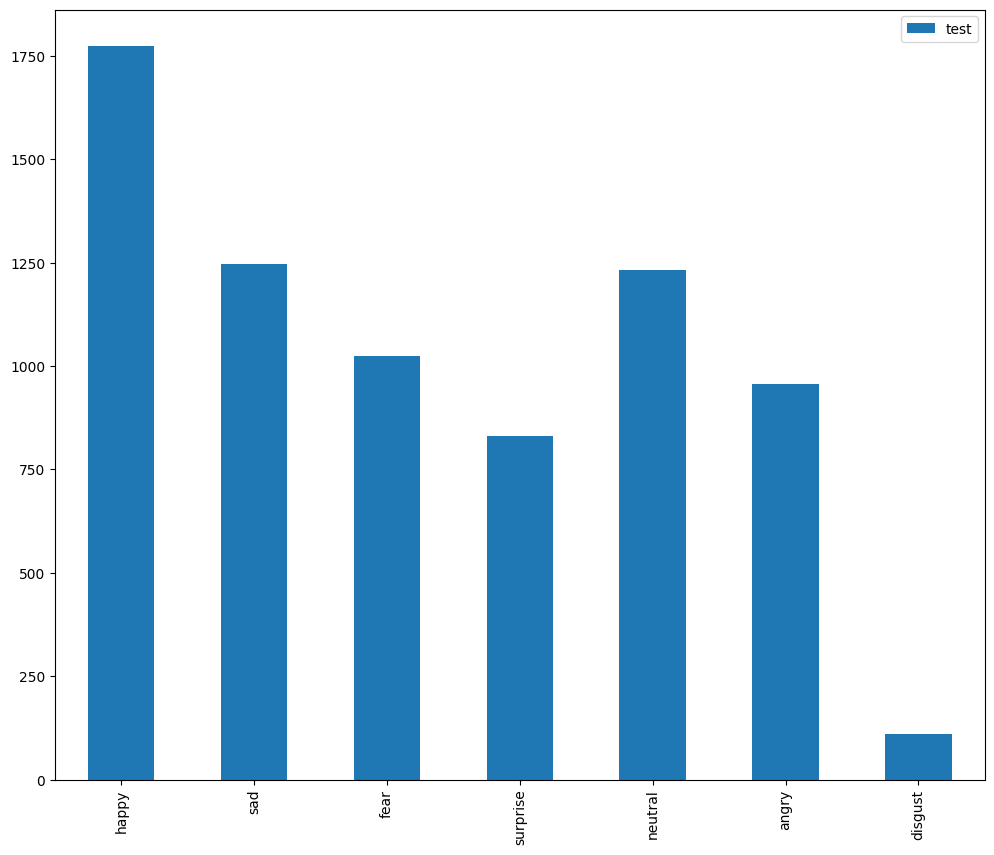

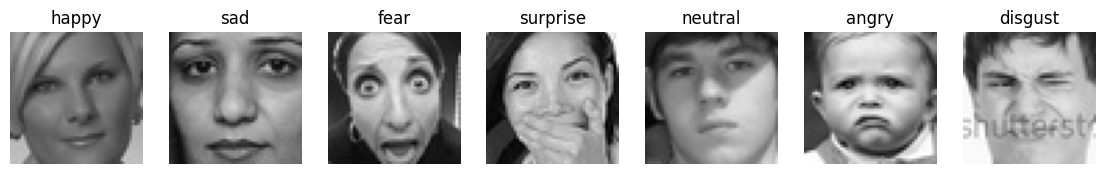

In [7]:
test_count.transpose().plot(kind='bar',figsize=(12, 10))

plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

# Data Preprocessing



In [8]:
shutil.rmtree( './train/disgust')
shutil.rmtree( './test/disgust')

In [9]:
# train dataset
images = []
labels = []
for subset in os.listdir(train_dir):
  image_list = os.listdir(os.path.join(train_dir,subset))  # all the names of images in the directory
  image_list = list(map(lambda x:os.path.join(subset,x),image_list))
  images.extend(image_list)
  labels.extend([subset]*len(image_list)) 

df = pd.DataFrame({"Images":images,"Labels":labels})      
df = df.sample(frac=1).reset_index(drop=True) # this will shuffle the data
samplesize = int(int(df.size)/14)  # sample size used for modelling 
print(samplesize)
df_train = df.head(samplesize)  

4039


In [10]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [11]:
train_generator = datagen.flow_from_dataframe(
    directory = train_dir, 
    dataframe=df_train,
    x_col="Images",
    y_col="Labels",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    target_size=(48,48), 
    class_mode="categorical", 
    color_mode="grayscale"
)

valid_generator=datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col="Images",
    y_col="Labels",
    subset="validation",
    color_mode="grayscale",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(48,48)
)

Found 3030 validated image filenames belonging to 6 classes.
Found 1009 validated image filenames belonging to 6 classes.


In [12]:
# test dataset
images = []
labels = []
for subset in os.listdir(test_dir):
  image_list = os.listdir(os.path.join(test_dir,subset))  # all the names of images in the directory
  image_list = list(map(lambda x:os.path.join(subset,x),image_list))
  images.extend(image_list)
  labels.extend([subset]*len(image_list)) 

df = pd.DataFrame({"Images":images,"Labels":labels})      
df = df.sample(frac=1).reset_index(drop=True) # To shuffle the data 
samplesize = int(int(df.size)/14)  # sample size used for modelling
print(samplesize)
df_test = df.head(samplesize) 

1009


In [13]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_dataframe(
    directory = test_dir, 
    target_size=(48,48), 
    #class_mode="categorical", 
    class_mode=None,
    shuffle=False,
    color_mode="grayscale",
    dataframe = df_test,
    x_col="Images",
    y_col="Labels",
    batch_size=32,
    seed=42,
)

Found 1009 validated image filenames.


In [14]:
model= tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(6, activation='sigmoid'))
model.add(Dense(6, activation='softmax'))


model.compile(
    optimizer = Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

2022-12-05 21:23:28.623931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
firstModel = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)

Epoch 1/20


/var/folders/12/5xns_y395177l4rh41lq_r6w0000gn/T/ipykernel_84208/210119755.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  firstModel = model.fit_generator(generator=train_generator,


94/94 [==============================] - 26s 266ms/step - loss: 1.7845 - accuracy: 0.2178 - val_loss: 1.9226 - val_accuracy: 0.1815
Epoch 2/20
94/94 [==============================] - 30s 314ms/step - loss: 1.6758 - accuracy: 0.3189 - val_loss: 1.8729 - val_accuracy: 0.1825
Epoch 3/20
83/94 [=========================>....] - ETA: 4s - loss: 1.6145 - accuracy: 0.3734

NameError: name 'firstModel' is not defined

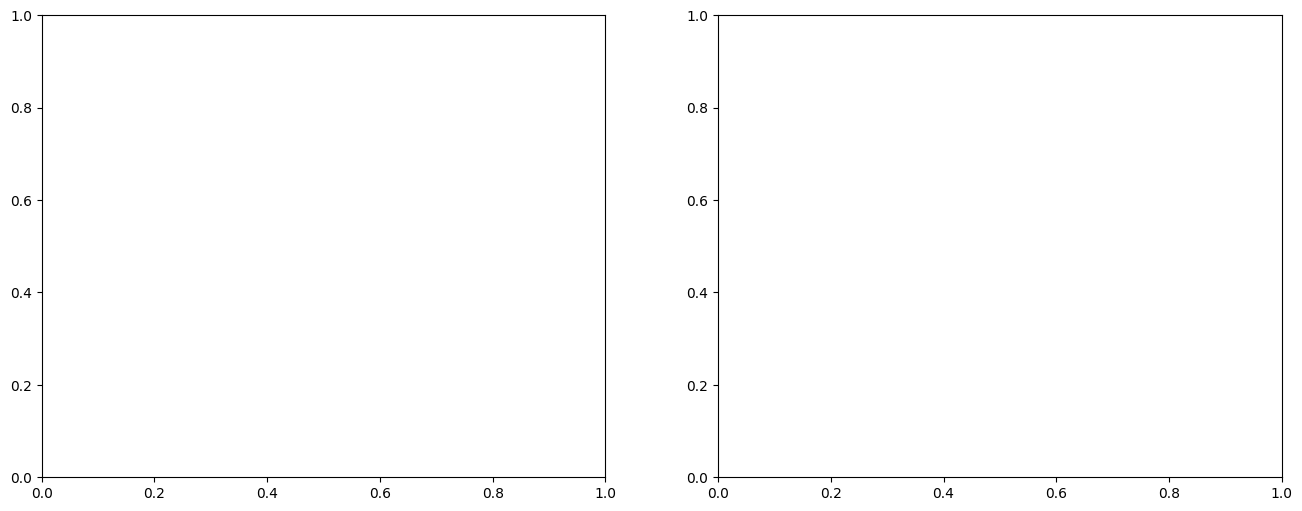

In [15]:
figure, axis = plt.subplots(1,2)
figure.set_size_inches(16,6)

train_ACC = firstModel.history['accuracy']
train_loss = firstModel.history['loss']

axis[0].plot(firstModel.history['accuracy'], color = "green")
axis[0].plot(firstModel.history['val_accuracy'])
axis[0].set_xlabel('Number of Epochs')
axis[0].set_ylabel('Accuracy values')
axis[0].set_title('Training against Validation Accuracy')
axis[0].legend(['Train', 'Test'], loc = 'lower left')

axis[1].plot(firstModel.history['loss'], color = "green")
axis[1].plot(firstModel.history['val_loss'])
axis[1].set_title('Training against Validation Loss')
axis[1].set_xlabel('Number of Epochs')
axis[1].set_ylabel('Loss Values')
axis[1].set_title('Training against Validation Loss')
axis[1].legend(['Train', 'Test'], loc ='lower left')

plt.show()

In [27]:
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_TEST)

<ipython-input-27-01f81cad14e1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_TEST)


[2.0249788761138916, 0.4022177457809448]

In [28]:
test_generator.reset()
pred=model.predict(test_generator, steps=STEP_SIZE_TEST)

31/31 [==============================] - 7s 206ms/step


In [29]:
predicted_class_indices=np.argmax(pred,axis=1)

In [30]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


In [31]:
train_loss, train_ACC = model.evaluate(train_generator)
test_loss, test_ACC   = model.evaluate(valid_generator)
print("The train accuracy = {:.3f} , test accuracy = {:.3f}".format(train_ACC*100, test_ACC*100))

32/32 [==============================] - 6s 199ms/step - loss: 2.0223 - accuracy: 0.4024
The train accuracy = 97.558 , test accuracy = 40.238


##### Applying the model on a random image to test it.

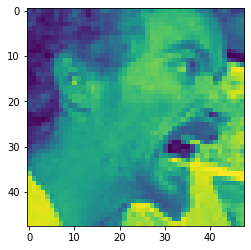

In [32]:
img = image.load_img("./test/angry/PrivateTest_10304478.jpg", target_size = (48,48), color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [33]:
label_dict = {0:'Angry',1:'Fear',2:'Happy',3:'Neutral',4:'Sad',5:'Surprise'}


In [34]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 160ms/step
[0.4031306, 0.39656538, 0.009515647, 0.12312976, 0.024715204, 0.042943463]


In [35]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry
